Dataset Info:
Shape: (768, 9)
Columns: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

Target distribution:
Outcome
0    500
1    268
Name: count, dtype: int64

3. FEATURE ENGINEERING...
Nuove dimensioni dopo feature engineering: (768, 18)

Features finali: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Glucose_risk', 'Glucose_very_high', 'BMI_obese', 'BMI_overweight', 'Age_high_risk', 'Age_very_high_risk', 'BP_high', 'Glucose_BMI_risk', 'Age_Glucose_risk']

Train set: (614, 17)
Test set: (154, 17)

4. SCALING DELLE FEATURES...

5. APPLICAZIONE SMOTE...
Prima di SMOTE: [400 214]
Dopo SMOTE: [400 400]

6. TRAINING RANDOM FOREST...

RISULTATI RANDOM FOREST OTTIMIZZATO
Accuratezza Training: 1.0000
Accuratezza Test: 0.7532
AUC Score: 0.8364
CV Score medio: 0.8125 (+/- 0.1183)

Classification Report:
              precision    recall  f1-score   s

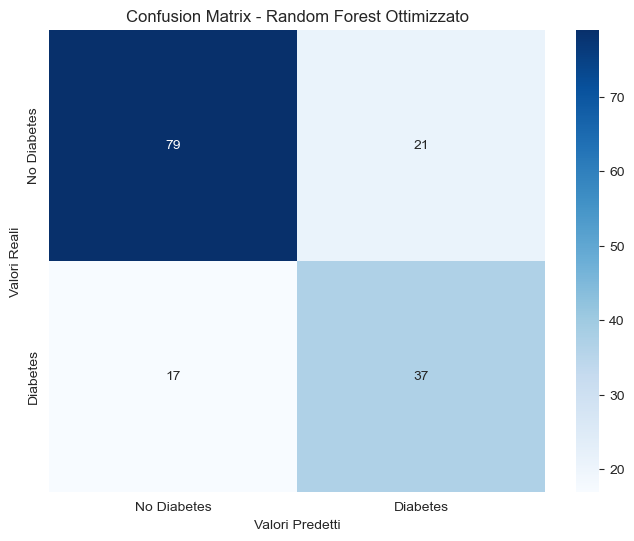


Top 10 Feature più Importanti:
                     feature  importance
1                    Glucose    0.183570
5                        BMI    0.127291
7                        Age    0.111765
6   DiabetesPedigreeFunction    0.109432
2              BloodPressure    0.079815
15          Glucose_BMI_risk    0.078226
0                Pregnancies    0.075591
3              SkinThickness    0.062894
4                    Insulin    0.056760
8               Glucose_risk    0.047337


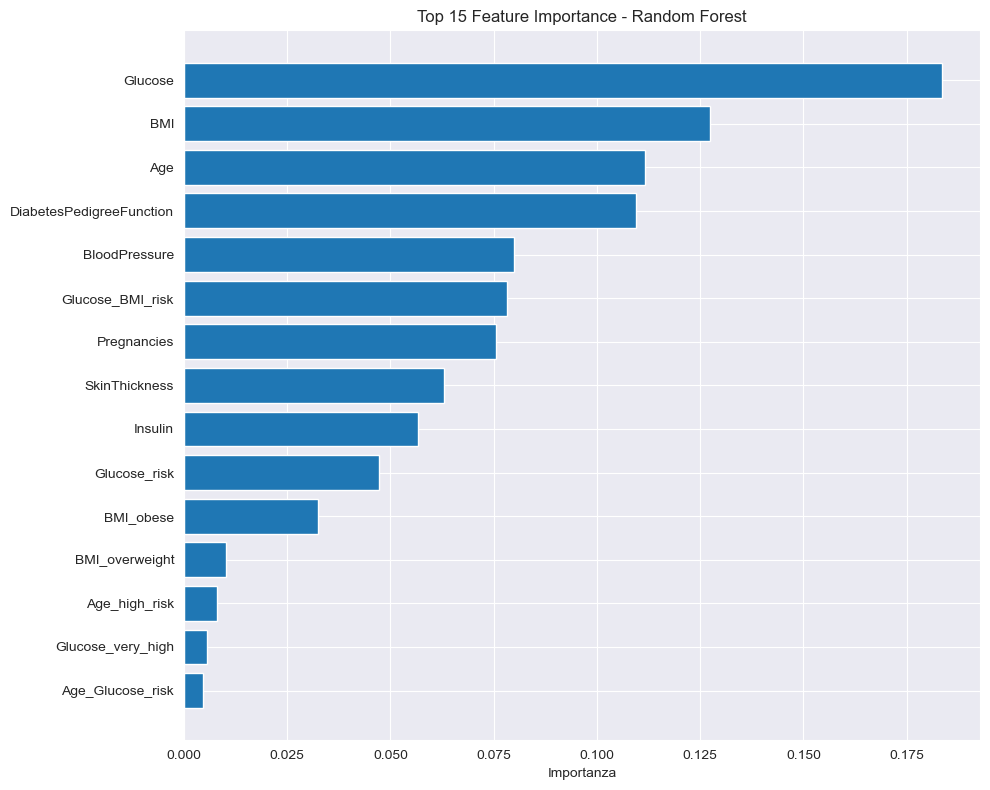


OPZIONE AVANZATA: GRID SEARCH
Esecuzione Grid Search... (può richiedere alcuni minuti)
Fitting 3 folds for each of 72 candidates, totalling 216 fits
Migliori parametri: {'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Miglior CV score: 0.8338
Accuratezza con parametri ottimali: 0.7532

RIEPILOGO FINALE
Accuratezza Random Forest Ottimizzato: 0.7532
AUC Score: 0.8364
Cross-Validation Score: 0.8125
⚠️ Risultati migliorabili. Considera di:
- Raccogliere più dati
- Provare altre tecniche di feature engineering
- Usare Grid Search per ottimizzare ulteriormente

Confronto con l'articolo:
- Articolo RF: ~97% accuratezza
- Il tuo RF: 75.3% accuratezza
📊 C'è ancora margine di miglioramento per raggiungere i risultati dell'articolo.


In [4]:
# CODICE COMPLETO RANDOM FOREST - DIABETES PREDICTION
# Copia questo codice nel tuo notebook Jupyter

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# 1. CARICA I DATI
# Sostituisci 'diabetes.csv' con il path del tuo file
df = pd.read_csv('diabetes.csv')  # <-- CAMBIA QUESTO PATH

print("Dataset Info:")
print(f"Shape: {df.shape}")
print(f"Columns: {list(df.columns)}")
print(f"\nTarget distribution:")
print(df['Outcome'].value_counts())

# 2. FEATURE ENGINEERING SEMPLICE
def add_derived_features(df):
    """Aggiunge feature derivate semplici"""
    df_new = df.copy()

    # Categorie di rischio basate su valori medici standard
    if 'Glucose' in df.columns:
        df_new['Glucose_risk'] = (df['Glucose'] > 125).astype(int)
        df_new['Glucose_very_high'] = (df['Glucose'] > 180).astype(int)

    if 'BMI' in df.columns:
        df_new['BMI_obese'] = (df['BMI'] > 30).astype(int)
        df_new['BMI_overweight'] = ((df['BMI'] > 25) & (df['BMI'] <= 30)).astype(int)

    if 'Age' in df.columns:
        df_new['Age_high_risk'] = (df['Age'] > 45).astype(int)
        df_new['Age_very_high_risk'] = (df['Age'] > 65).astype(int)

    if 'BloodPressure' in df.columns:
        df_new['BP_high'] = (df['BloodPressure'] > 90).astype(int)

    # Interazioni semplici
    if 'Glucose' in df.columns and 'BMI' in df.columns:
        df_new['Glucose_BMI_risk'] = df_new['Glucose_risk'] * df_new['BMI_obese']

    if 'Age' in df.columns and 'Glucose' in df.columns:
        df_new['Age_Glucose_risk'] = df_new['Age_high_risk'] * df_new['Glucose_risk']

    return df_new

# Applica feature engineering
print("\n3. FEATURE ENGINEERING...")
df_enhanced = add_derived_features(df)
print(f"Nuove dimensioni dopo feature engineering: {df_enhanced.shape}")

# 3. SEPARAZIONE FEATURES E TARGET
X = df_enhanced.drop('Outcome', axis=1)
y = df_enhanced['Outcome']

print(f"\nFeatures finali: {list(X.columns)}")

# 4. SPLIT DEI DATI
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\nTrain set: {X_train.shape}")
print(f"Test set: {X_test.shape}")

# 5. SCALING DELLE FEATURES
print("\n4. SCALING DELLE FEATURES...")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 6. APPLICAZIONE SMOTE
print("\n5. APPLICAZIONE SMOTE...")
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

print(f"Prima di SMOTE: {y_train.value_counts().values}")
print(f"Dopo SMOTE: {np.bincount(y_train_smote)}")

# 7. TRAINING RANDOM FOREST OTTIMIZZATO
print("\n6. TRAINING RANDOM FOREST...")

# Opzione A: Random Forest con parametri ottimizzati (VELOCE)
rf_optimized = RandomForestClassifier(
    n_estimators=1000,
    max_depth=15,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='sqrt',
    random_state=42,
    class_weight='balanced',
    n_jobs=-1
)

# Training
rf_optimized.fit(X_train_smote, y_train_smote)

# 8. PREDIZIONI
y_train_pred = rf_optimized.predict(X_train_scaled)
y_test_pred = rf_optimized.predict(X_test_scaled)

# Probabilità per AUC
y_test_proba = rf_optimized.predict_proba(X_test_scaled)[:, 1]

# 9. VALUTAZIONE RISULTATI
print("\n" + "="*50)
print("RISULTATI RANDOM FOREST OTTIMIZZATO")
print("="*50)

# Accuratezza
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)
auc_score = roc_auc_score(y_test, y_test_proba)

print(f"Accuratezza Training: {train_acc:.4f}")
print(f"Accuratezza Test: {test_acc:.4f}")
print(f"AUC Score: {auc_score:.4f}")

# Cross-validation
cv_scores = cross_val_score(rf_optimized, X_train_smote, y_train_smote, cv=5)
print(f"CV Score medio: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

# Classification Report
print(f"\nClassification Report:")
print(classification_report(y_test, y_test_pred))

# 10. VISUALIZZAZIONE CONFUSION MATRIX
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Diabetes', 'Diabetes'],
            yticklabels=['No Diabetes', 'Diabetes'])
plt.title('Confusion Matrix - Random Forest Ottimizzato')
plt.ylabel('Valori Reali')
plt.xlabel('Valori Predetti')
plt.show()

# 11. FEATURE IMPORTANCE
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_optimized.feature_importances_
}).sort_values('importance', ascending=False)

print(f"\nTop 10 Feature più Importanti:")
print(feature_importance.head(10))

# Visualizzazione Feature Importance
plt.figure(figsize=(10, 8))
top_features = feature_importance.head(15)
plt.barh(range(len(top_features)), top_features['importance'])
plt.yticks(range(len(top_features)), top_features['feature'])
plt.xlabel('Importanza')
plt.title('Top 15 Feature Importance - Random Forest')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# 12. OPZIONE B: GRID SEARCH PER PARAMETRI OTTIMALI (LENTA MA MIGLIORE)
print("\n" + "="*50)
print("OPZIONE AVANZATA: GRID SEARCH")
print("="*50)

risposta = input("Vuoi eseguire Grid Search per trovare i parametri ottimali? (y/n): ")

if risposta.lower() == 'y':
    print("Esecuzione Grid Search... (può richiedere alcuni minuti)")

    param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [10, 15, 20],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2],
        'max_features': ['sqrt', 'log2']
    }

    rf_grid = RandomForestClassifier(random_state=42, n_jobs=-1, class_weight='balanced')
    grid_search = GridSearchCV(
        rf_grid, param_grid,
        cv=3,
        scoring='accuracy',
        n_jobs=-1,
        verbose=1
    )

    grid_search.fit(X_train_smote, y_train_smote)

    print(f"Migliori parametri: {grid_search.best_params_}")
    print(f"Miglior CV score: {grid_search.best_score_:.4f}")

    # Test con i migliori parametri
    best_rf = grid_search.best_estimator_
    y_test_pred_best = best_rf.predict(X_test_scaled)
    test_acc_best = accuracy_score(y_test, y_test_pred_best)

    print(f"Accuratezza con parametri ottimali: {test_acc_best:.4f}")

# 13. RIEPILOGO FINALE
print("\n" + "="*50)
print("RIEPILOGO FINALE")
print("="*50)
print(f"Accuratezza Random Forest Ottimizzato: {test_acc:.4f}")
print(f"AUC Score: {auc_score:.4f}")
print(f"Cross-Validation Score: {cv_scores.mean():.4f}")

if test_acc > 0.85:
    print("🎉 Ottimi risultati! Il modello ha performance molto buone.")
elif test_acc > 0.80:
    print("✅ Buoni risultati! Il modello ha performance soddisfacenti.")
else:
    print("⚠️ Risultati migliorabili. Considera di:")
    print("- Raccogliere più dati")
    print("- Provare altre tecniche di feature engineering")
    print("- Usare Grid Search per ottimizzare ulteriormente")

print(f"\nConfronto con l'articolo:")
print(f"- Articolo RF: ~97% accuratezza")
print(f"- Il tuo RF: {test_acc:.1%} accuratezza")

if test_acc >= 0.95:
    print("🏆 Risultati paragonabili all'articolo!")
elif test_acc >= 0.90:
    print("👍 Risultati molto vicini all'articolo!")
else:
    print("📊 C'è ancora margine di miglioramento per raggiungere i risultati dell'articolo.")

DIABETES PREDICTION - RANDOM FOREST ANALYSIS

1. CARICAMENTO DATI
------------------------------
Dataset shape: (768, 9)
Features: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

2. EXPLORATORY DATA ANALYSIS
------------------------------

Informazioni generali:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   

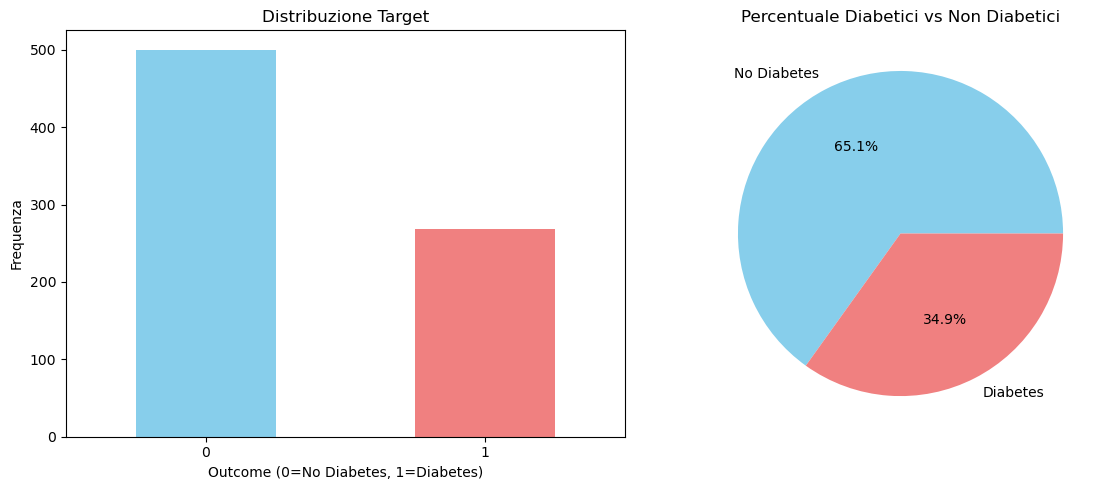


Distribuzione delle features:


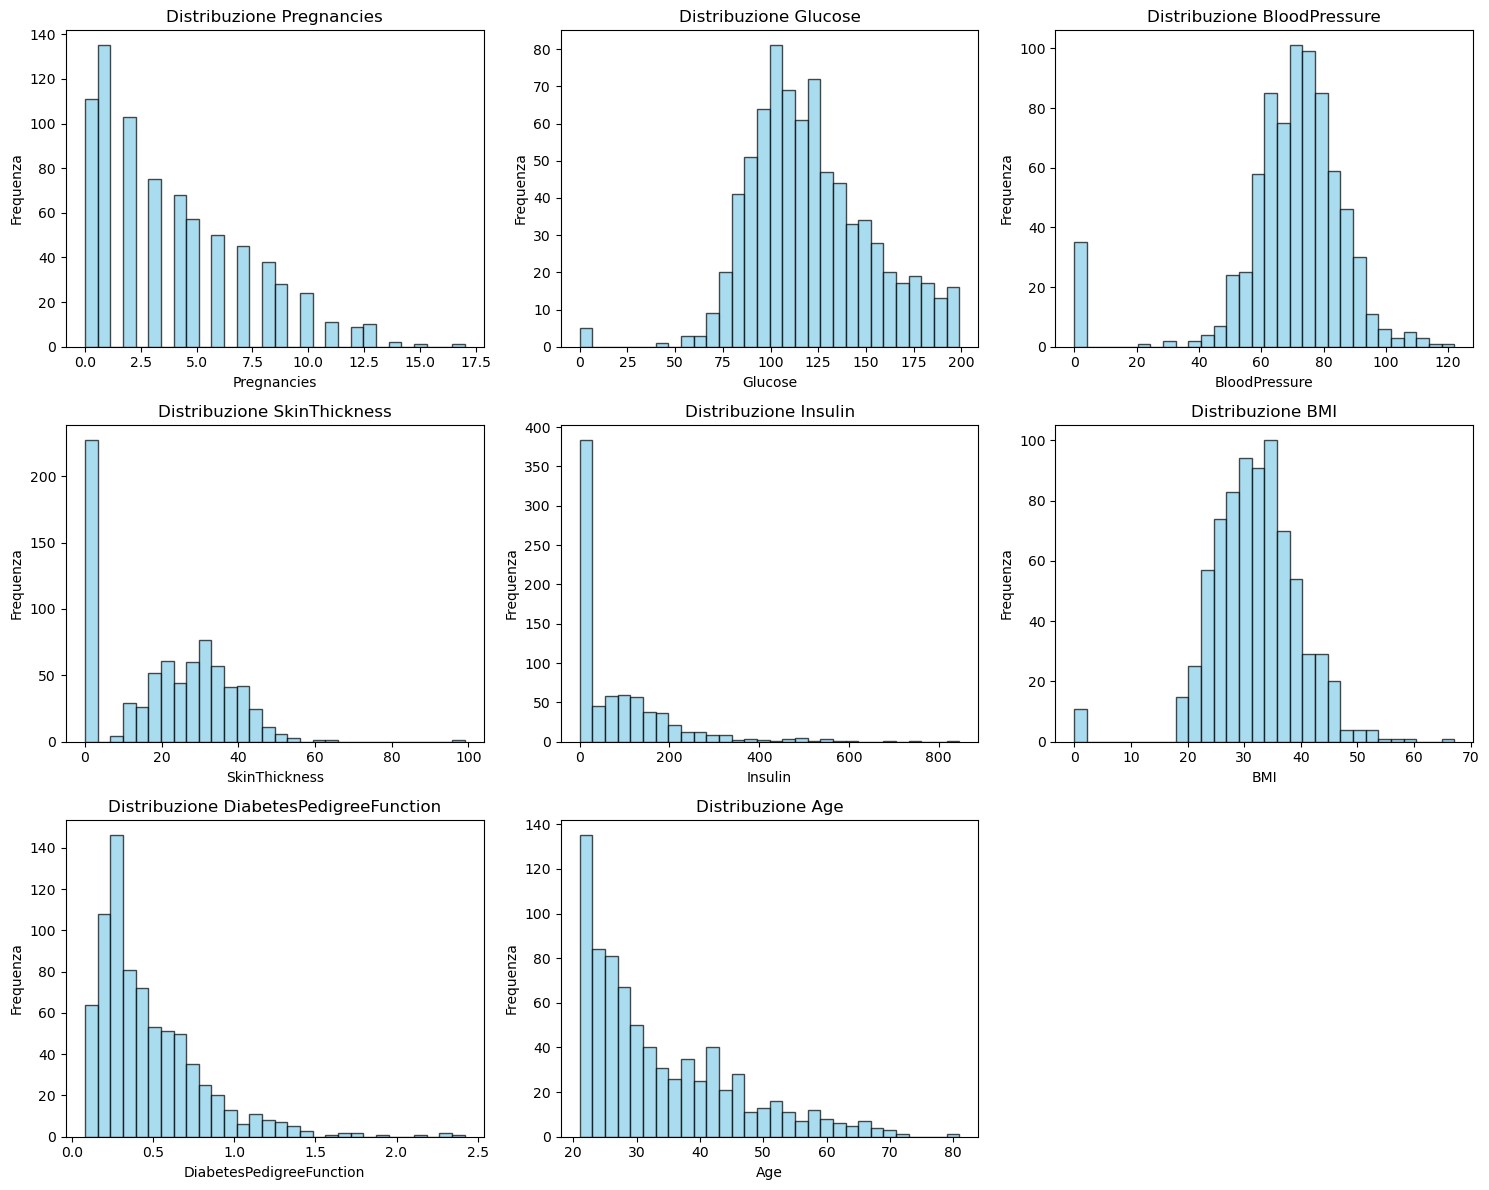


Analisi Outliers:


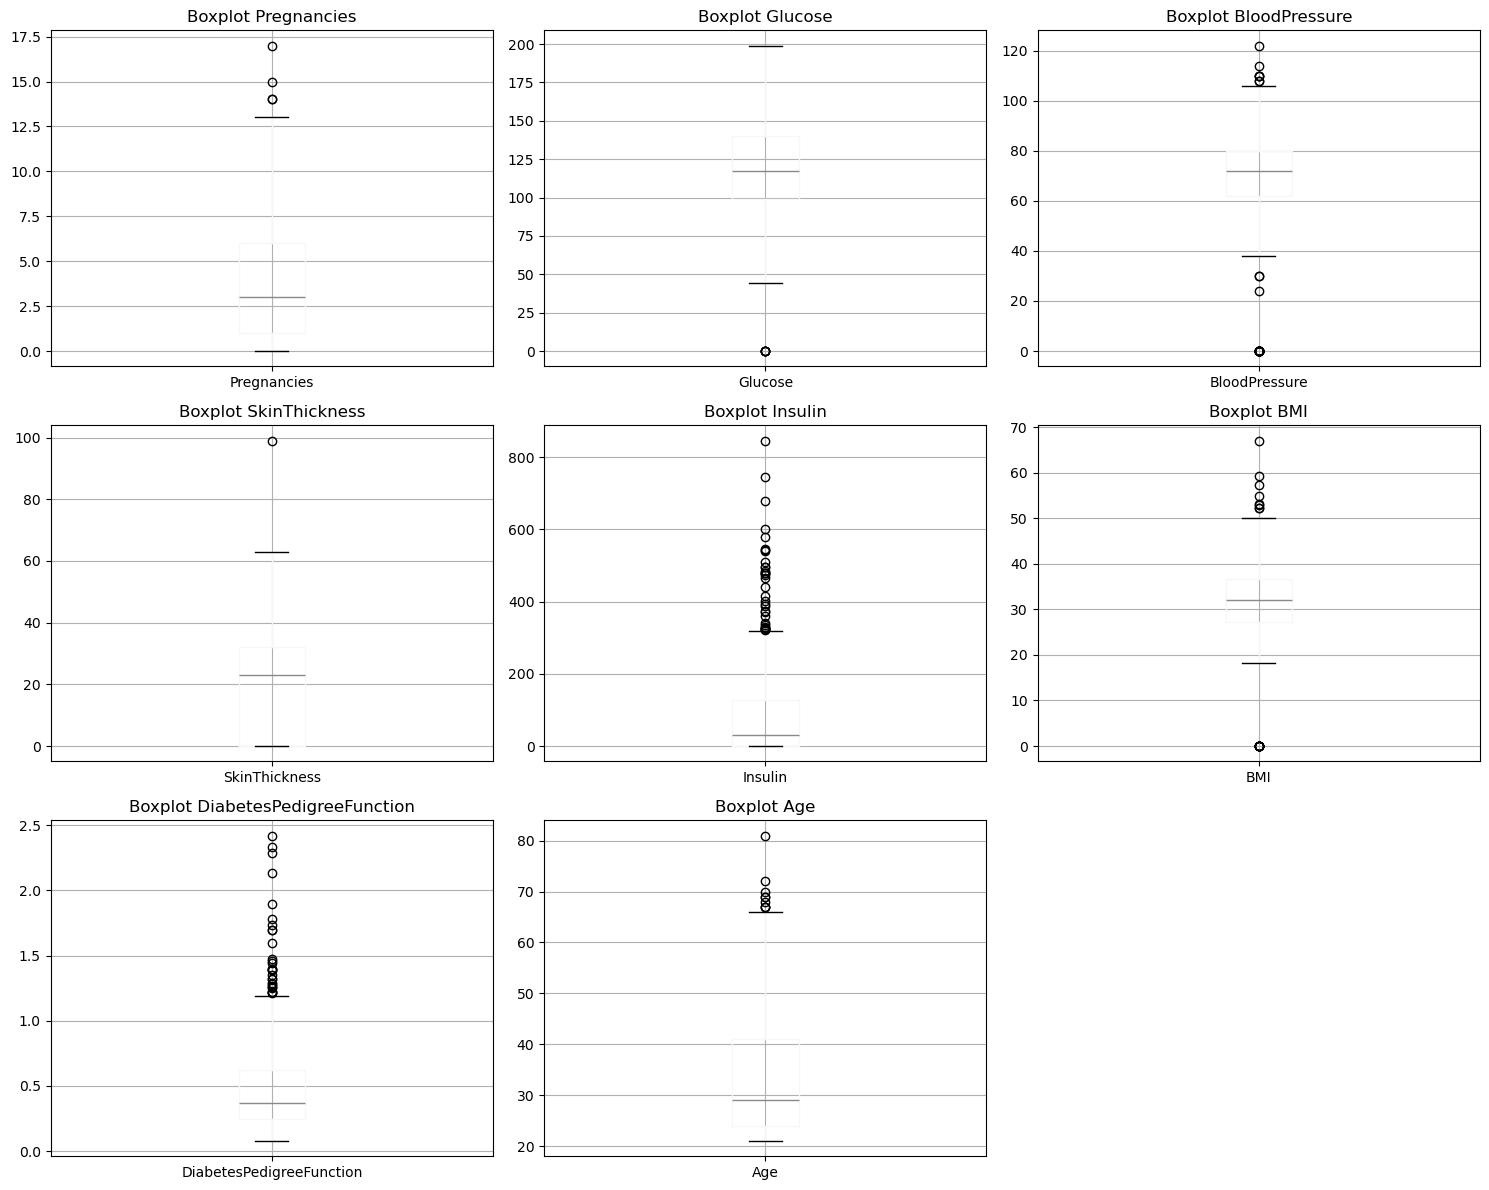


Matrice di Correlazione:


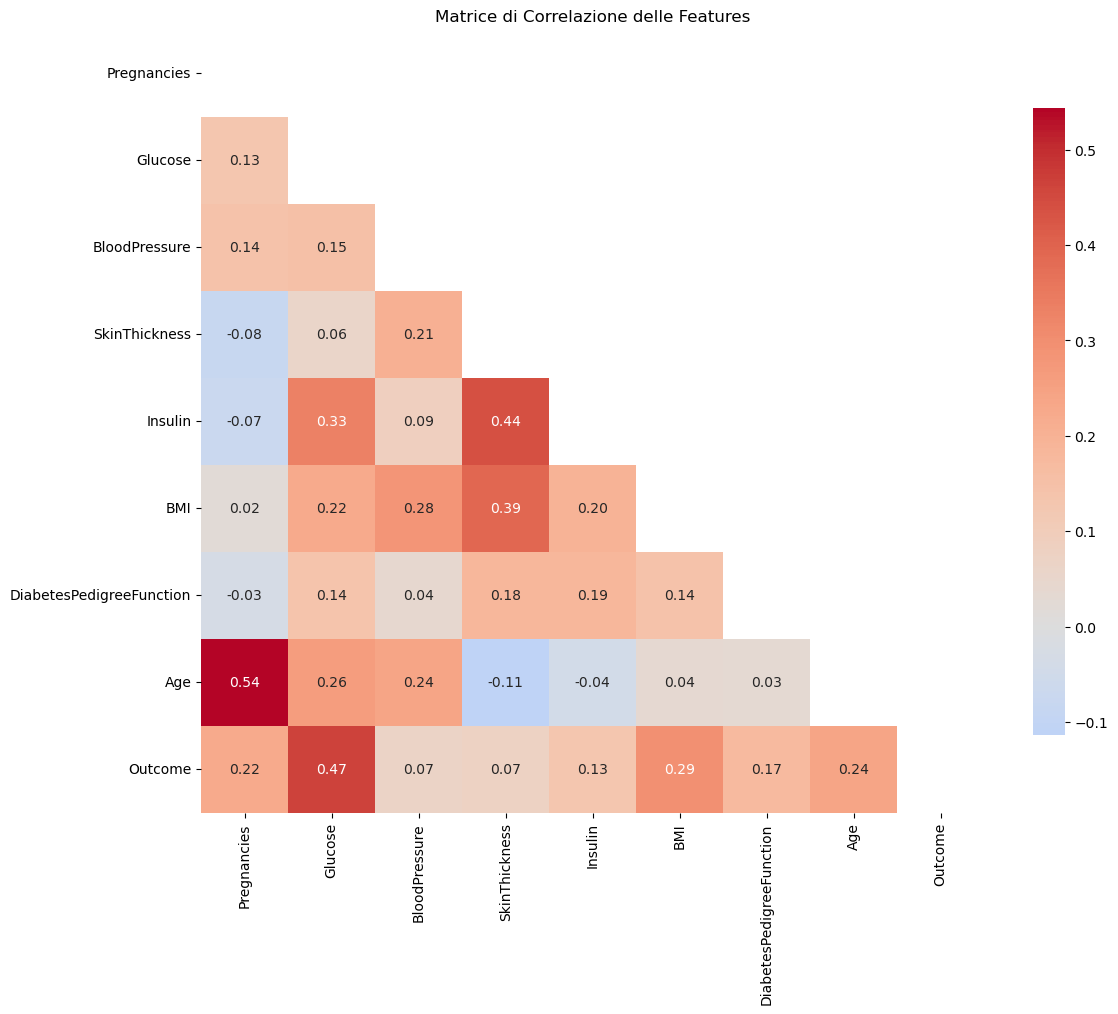


Correlazioni con il Target (Outcome):
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64

Comparativo Diabetici vs Non Diabetici:
                          Non_Diabetic_Mean  Diabetic_Mean  Difference
Insulin                           68.792000     100.335821   31.543821
Glucose                          109.980000     141.257463   31.277463
Age                               31.190000      37.067164    5.877164
BMI                               30.304200      35.142537    4.838337
BloodPressure                     68.184000      70.824627    2.640627
SkinThickness                     19.664000      22.164179    2.500179
Pregnancies                        3.298000       4.865672    1.567672
DiabetesPedigreeFunction  

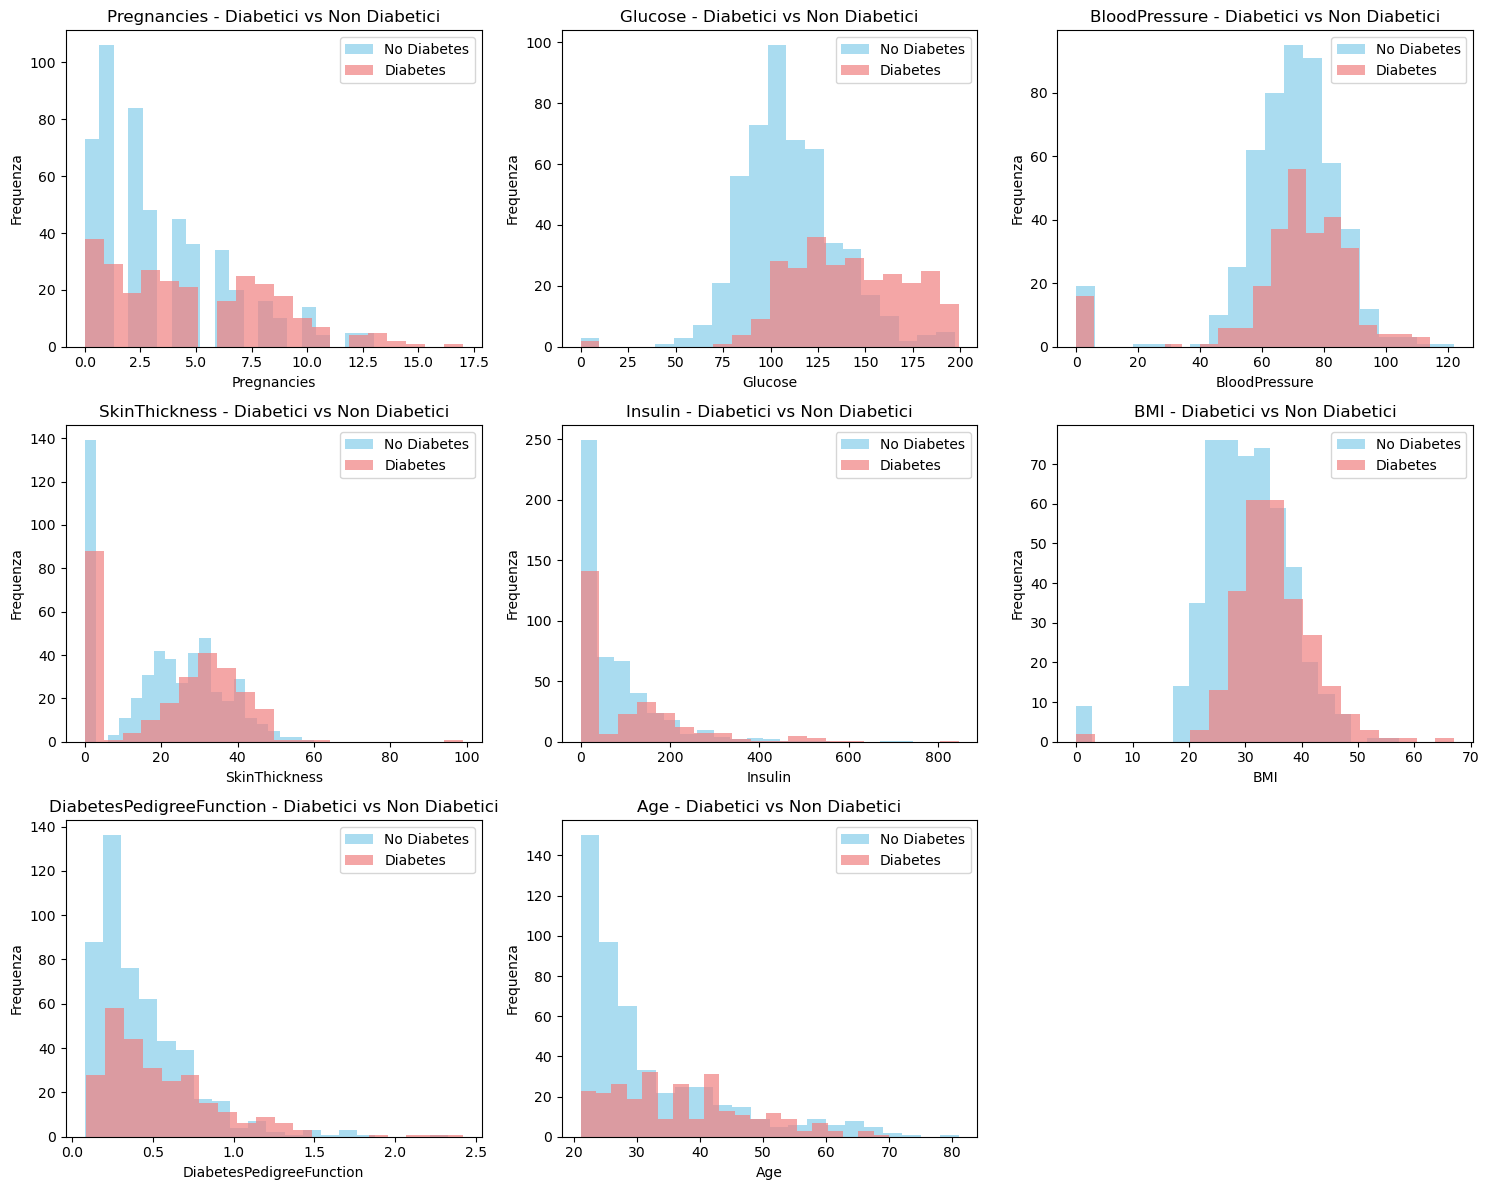


3. FEATURE ENGINEERING
------------------------------
Features originali: 9
Features dopo engineering: 18
Nuove features: ['Glucose_risk', 'Glucose_very_high', 'BMI_obese', 'BMI_overweight', 'Age_high_risk', 'Age_very_high_risk', 'BP_high', 'Glucose_BMI_risk', 'Age_Glucose_risk']

4. PREPARAZIONE DATI
------------------------------
Training set: (614, 17)
Test set: (154, 17)
Prima di SMOTE - Classe 0: 400, Classe 1: 214
Dopo SMOTE - Classe 0: 400, Classe 1: 400

5. TRAINING RANDOM FOREST OTTIMIZZATO
------------------------------
Training in corso...

6. VALUTAZIONE DEL MODELLO
------------------------------
Accuratezza Training: 1.0000
Accuratezza Test: 0.7532
AUC Score: 0.8343
CV Score medio: 0.8088 (+/- 0.1077)

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.80      0.81       100
           1       0.64      0.67      0.65        54

    accuracy                           0.75       154
   macro avg       0.73      0.73

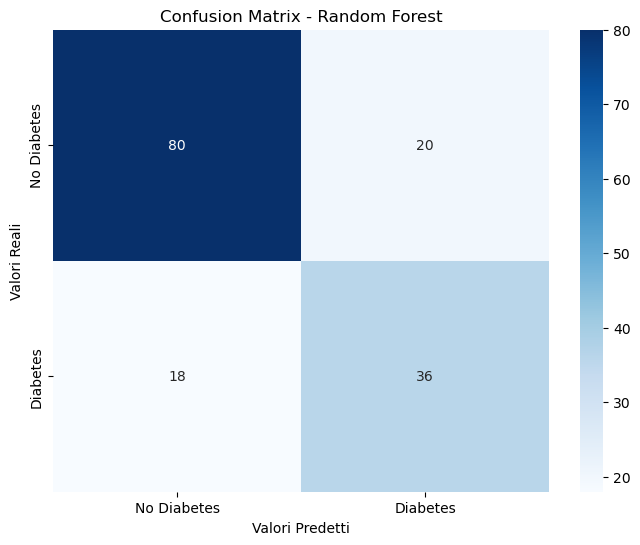


Top 10 Feature più Importanti:
                     feature  importance
1                    Glucose    0.186847
5                        BMI    0.127609
6   DiabetesPedigreeFunction    0.111133
7                        Age    0.108334
2              BloodPressure    0.077675
0                Pregnancies    0.075447
15          Glucose_BMI_risk    0.073349
3              SkinThickness    0.064649
4                    Insulin    0.058454
8               Glucose_risk    0.048418


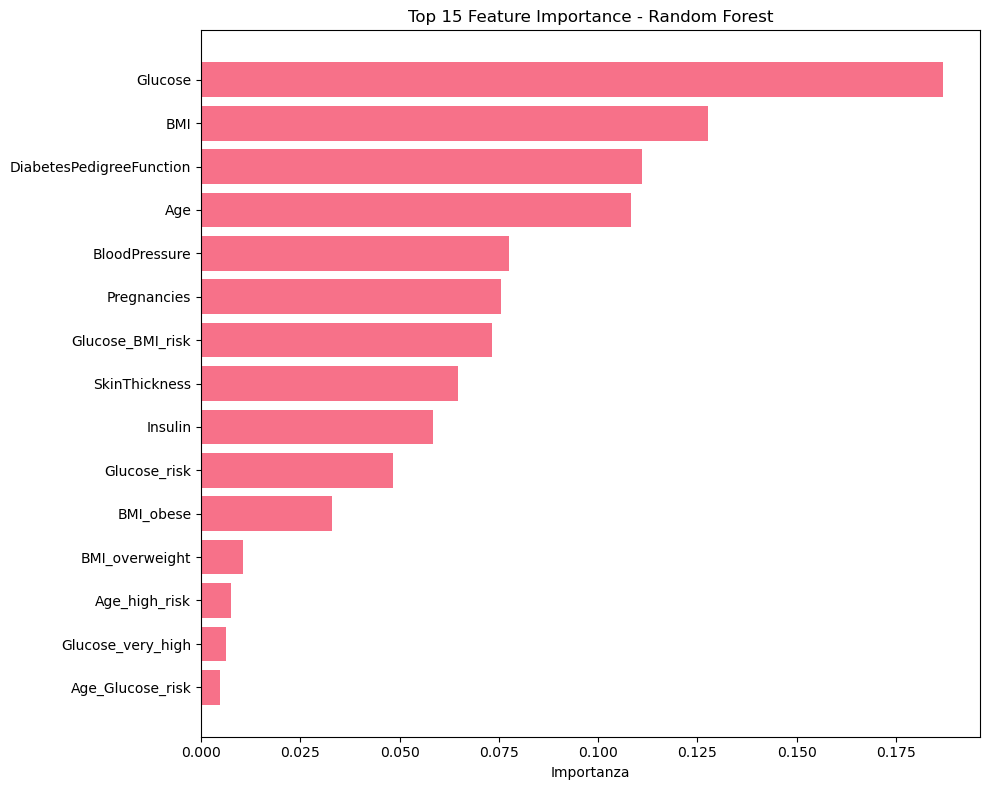


7. FUNZIONE DI PREDIZIONE
------------------------------

Esempio di utilizzo della funzione di predizione:
Caso 1 - Profilo a basso rischio:
Predizione: No Diabete
Probabilità diabete: 0.50%

Caso 2 - Profilo ad alto rischio:
Predizione: Diabete
Probabilità diabete: 88.50%

RIEPILOGO FINALE
✅ Accuratezza del modello: 75.3%
✅ AUC Score: 0.834
✅ Cross-Validation Score: 0.809

PREDIZIONE INTERATTIVA
Inserisci i valori clinici per fare una predizione:

============================== RISULTATO ==============================
Predizione: 🟢 NO DIABETE
Probabilità diabete: 38.00%
📊 Rischio: MODERATO

🎉 Analisi completata! Il modello è pronto per l'uso.


In [5]:
# CODICE COMPLETO: DIABETES PREDICTION CON RANDOM FOREST
# Include: EDA Completa + Modello Ottimizzato + Funzione Predizione

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Configurazione per i grafici
plt.style.use('default')
sns.set_palette("husl")

print("="*60)
print("DIABETES PREDICTION - RANDOM FOREST ANALYSIS")
print("="*60)

# 1. CARICAMENTO DATI
print("\n1. CARICAMENTO DATI")
print("-" * 30)

# Sostituisci con il path del tuo file
df = pd.read_csv('diabetes.csv')  # <-- CAMBIA QUESTO PATH

print(f"Dataset shape: {df.shape}")
print(f"Features: {list(df.columns)}")

# 2. EXPLORATORY DATA ANALYSIS (EDA)
print("\n2. EXPLORATORY DATA ANALYSIS")
print("-" * 30)

# Informazioni generali sul dataset
print("\nInformazioni generali:")
print(df.info())

print("\nStatistiche descrittive:")
print(df.describe())

# Controllo valori mancanti
print(f"\nValori mancanti per colonna:")
print(df.isnull().sum())

# Target distribution
print(f"\nDistribuzione target (Outcome):")
target_counts = df['Outcome'].value_counts()
print(target_counts)
print(f"Percentuale diabetici: {target_counts[1]/len(df)*100:.1f}%")

# Visualizzazione distribuzione target
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Grafico a barre
target_counts.plot(kind='bar', ax=ax1, color=['skyblue', 'lightcoral'])
ax1.set_title('Distribuzione Target')
ax1.set_xlabel('Outcome (0=No Diabetes, 1=Diabetes)')
ax1.set_ylabel('Frequenza')
ax1.tick_params(axis='x', rotation=0)

# Grafico a torta
ax2.pie(target_counts.values, labels=['No Diabetes', 'Diabetes'],
        autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
ax2.set_title('Percentuale Diabetici vs Non Diabetici')

plt.tight_layout()
plt.show()

# Distribuzione delle features numeriche
print("\nDistribuzione delle features:")
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.ravel()

features = df.columns[:-1]  # Tutte tranne 'Outcome'

for i, feature in enumerate(features):
    if i < len(axes):
        # Istogramma
        axes[i].hist(df[feature], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
        axes[i].set_title(f'Distribuzione {feature}')
        axes[i].set_xlabel(feature)
        axes[i].set_ylabel('Frequenza')

# Rimuovi subplot vuoti se necessario
for i in range(len(features), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

# Boxplot per identificare outliers
print("\nAnalisi Outliers:")
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.ravel()

for i, feature in enumerate(features):
    if i < len(axes):
        df.boxplot(column=feature, ax=axes[i])
        axes[i].set_title(f'Boxplot {feature}')

# Rimuovi subplot vuoti se necessario
for i in range(len(features), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

# Matrice di correlazione
print("\nMatrice di Correlazione:")
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', center=0,
            square=True, fmt='.2f', cbar_kws={"shrink": .8})
plt.title('Matrice di Correlazione delle Features')
plt.tight_layout()
plt.show()

# Top correlazioni con il target
print("\nCorrelazioni con il Target (Outcome):")
target_corr = df.corr()['Outcome'].abs().sort_values(ascending=False)[1:]  # Escludi la correlazione con se stesso
print(target_corr)

# Analisi per diabetici vs non diabetici
print("\nComparativo Diabetici vs Non Diabetici:")
diabetic = df[df['Outcome'] == 1]
non_diabetic = df[df['Outcome'] == 0]

comparison_stats = pd.DataFrame({
    'Non_Diabetic_Mean': non_diabetic.drop('Outcome', axis=1).mean(),
    'Diabetic_Mean': diabetic.drop('Outcome', axis=1).mean(),
    'Difference': diabetic.drop('Outcome', axis=1).mean() - non_diabetic.drop('Outcome', axis=1).mean()
})
print(comparison_stats.sort_values('Difference', key=abs, ascending=False))

# Visualizzazione comparativa
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.ravel()

for i, feature in enumerate(features):
    if i < len(axes):
        # Istogramma sovrapposto
        axes[i].hist(non_diabetic[feature], bins=20, alpha=0.7, label='No Diabetes', color='skyblue')
        axes[i].hist(diabetic[feature], bins=20, alpha=0.7, label='Diabetes', color='lightcoral')
        axes[i].set_title(f'{feature} - Diabetici vs Non Diabetici')
        axes[i].set_xlabel(feature)
        axes[i].set_ylabel('Frequenza')
        axes[i].legend()

# Rimuovi subplot vuoti se necessario
for i in range(len(features), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

# 3. FEATURE ENGINEERING
print("\n3. FEATURE ENGINEERING")
print("-" * 30)

def add_derived_features(df):
    """Aggiunge feature derivate basate su conoscenze mediche"""
    df_new = df.copy()

    # Categorie di rischio basate su valori medici standard
    if 'Glucose' in df.columns:
        df_new['Glucose_risk'] = (df['Glucose'] > 125).astype(int)
        df_new['Glucose_very_high'] = (df['Glucose'] > 180).astype(int)

    if 'BMI' in df.columns:
        df_new['BMI_obese'] = (df['BMI'] > 30).astype(int)
        df_new['BMI_overweight'] = ((df['BMI'] > 25) & (df['BMI'] <= 30)).astype(int)

    if 'Age' in df.columns:
        df_new['Age_high_risk'] = (df['Age'] > 45).astype(int)
        df_new['Age_very_high_risk'] = (df['Age'] > 65).astype(int)

    if 'BloodPressure' in df.columns:
        df_new['BP_high'] = (df['BloodPressure'] > 90).astype(int)

    # Interazioni semplici
    if 'Glucose' in df.columns and 'BMI' in df.columns:
        df_new['Glucose_BMI_risk'] = df_new['Glucose_risk'] * df_new['BMI_obese']

    if 'Age' in df.columns and 'Glucose' in df.columns:
        df_new['Age_Glucose_risk'] = df_new['Age_high_risk'] * df_new['Glucose_risk']

    return df_new

# Applica feature engineering
df_enhanced = add_derived_features(df)
print(f"Features originali: {df.shape[1]}")
print(f"Features dopo engineering: {df_enhanced.shape[1]}")
print(f"Nuove features: {list(df_enhanced.columns[len(df.columns):])}")

# 4. PREPARAZIONE DATI PER IL MODELLO
print("\n4. PREPARAZIONE DATI")
print("-" * 30)

# Separazione features e target
X = df_enhanced.drop('Outcome', axis=1)
y = df_enhanced['Outcome']

# Split dei dati
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set: {X_train.shape}")
print(f"Test set: {X_test.shape}")

# Scaling delle features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Applicazione SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

print(f"Prima di SMOTE - Classe 0: {sum(y_train == 0)}, Classe 1: {sum(y_train == 1)}")
print(f"Dopo SMOTE - Classe 0: {sum(y_train_smote == 0)}, Classe 1: {sum(y_train_smote == 1)}")

# 5. TRAINING RANDOM FOREST
print("\n5. TRAINING RANDOM FOREST OTTIMIZZATO")
print("-" * 30)

# Random Forest con parametri ottimizzati
rf_optimized = RandomForestClassifier(
    n_estimators=200,
    max_depth=15,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='sqrt',
    random_state=42,
    class_weight='balanced',
    n_jobs=-1
)

# Training
print("Training in corso...")
rf_optimized.fit(X_train_smote, y_train_smote)

# 6. VALUTAZIONE DEL MODELLO
print("\n6. VALUTAZIONE DEL MODELLO")
print("-" * 30)

# Predizioni
y_train_pred = rf_optimized.predict(X_train_scaled)
y_test_pred = rf_optimized.predict(X_test_scaled)
y_test_proba = rf_optimized.predict_proba(X_test_scaled)[:, 1]

# Metriche
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)
auc_score = roc_auc_score(y_test, y_test_proba)

print(f"Accuratezza Training: {train_acc:.4f}")
print(f"Accuratezza Test: {test_acc:.4f}")
print(f"AUC Score: {auc_score:.4f}")

# Cross-validation
cv_scores = cross_val_score(rf_optimized, X_train_smote, y_train_smote, cv=5)
print(f"CV Score medio: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

# Classification Report
print(f"\nClassification Report:")
print(classification_report(y_test, y_test_pred))

# Confusion Matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Diabetes', 'Diabetes'],
            yticklabels=['No Diabetes', 'Diabetes'])
plt.title('Confusion Matrix - Random Forest')
plt.ylabel('Valori Reali')
plt.xlabel('Valori Predetti')
plt.show()

# Feature Importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_optimized.feature_importances_
}).sort_values('importance', ascending=False)

print(f"\nTop 10 Feature più Importanti:")
print(feature_importance.head(10))

# Visualizzazione Feature Importance
plt.figure(figsize=(10, 8))
top_features = feature_importance.head(15)
plt.barh(range(len(top_features)), top_features['importance'])
plt.yticks(range(len(top_features)), top_features['feature'])
plt.xlabel('Importanza')
plt.title('Top 15 Feature Importance - Random Forest')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# 7. FUNZIONE DI PREDIZIONE
print("\n7. FUNZIONE DI PREDIZIONE")
print("-" * 30)

def predict_diabetes(pregnancies, glucose, blood_pressure, skin_thickness,
                    insulin, bmi, diabetes_pedigree, age):
    """
    Predice la probabilità di diabete basandosi sui parametri clinici

    Parametri:
    - pregnancies: Numero di gravidanze
    - glucose: Livello di glucosio nel sangue
    - blood_pressure: Pressione sanguigna diastolica
    - skin_thickness: Spessore della pelle del tricipite
    - insulin: Livello di insulina
    - bmi: Indice di massa corporea
    - diabetes_pedigree: Funzione pedigree del diabete
    - age: Età

    Ritorna:
    - prediction: 0 (No Diabetes) o 1 (Diabetes)
    - probability: Probabilità di avere il diabete (0-1)
    """

    # Crea DataFrame con i valori inseriti
    input_data = pd.DataFrame({
        'Pregnancies': [pregnancies],
        'Glucose': [glucose],
        'BloodPressure': [blood_pressure],
        'SkinThickness': [skin_thickness],
        'Insulin': [insulin],
        'BMI': [bmi],
        'DiabetesPedigreeFunction': [diabetes_pedigree],
        'Age': [age]
    })

    # Applica lo stesso feature engineering
    input_enhanced = add_derived_features(input_data)

    # Assicurati che abbia le stesse colonne del training set
    for col in X.columns:
        if col not in input_enhanced.columns:
            input_enhanced[col] = 0

    # Riordina le colonne come nel training set
    input_enhanced = input_enhanced[X.columns]

    # Scaling
    input_scaled = scaler.transform(input_enhanced)

    # Predizione
    prediction = rf_optimized.predict(input_scaled)[0]
    probability = rf_optimized.predict_proba(input_scaled)[0, 1]

    return prediction, probability

# Esempio di utilizzo della funzione
print("\nEsempio di utilizzo della funzione di predizione:")
print("Caso 1 - Profilo a basso rischio:")
pred1, prob1 = predict_diabetes(
    pregnancies=1, glucose=85, blood_pressure=70, skin_thickness=20,
    insulin=80, bmi=22.5, diabetes_pedigree=0.25, age=25
)
print(f"Predizione: {'Diabete' if pred1 == 1 else 'No Diabete'}")
print(f"Probabilità diabete: {prob1:.2%}")

print("\nCaso 2 - Profilo ad alto rischio:")
pred2, prob2 = predict_diabetes(
    pregnancies=5, glucose=180, blood_pressure=95, skin_thickness=35,
    insulin=200, bmi=35.0, diabetes_pedigree=0.8, age=55
)
print(f"Predizione: {'Diabete' if pred2 == 1 else 'No Diabete'}")
print(f"Probabilità diabete: {prob2:.2%}")

# 8. FUNZIONE INTERATTIVA PER NUOVE PREDIZIONI
def interactive_prediction():
    """Funzione interattiva per fare nuove predizioni"""
    print("\n" + "="*50)
    print("PREDIZIONE INTERATTIVA")
    print("="*50)
    print("Inserisci i valori clinici per fare una predizione:")

    try:
        pregnancies = float(input("Numero di gravidanze: "))
        glucose = float(input("Livello di glucosio (mg/dL): "))
        blood_pressure = float(input("Pressione sanguigna diastolica (mmHg): "))
        skin_thickness = float(input("Spessore pelle tricipite (mm): "))
        insulin = float(input("Livello di insulina (mu U/ml): "))
        bmi = float(input("BMI (kg/m²): "))
        diabetes_pedigree = float(input("Funzione pedigree diabete (0-2): "))
        age = float(input("Età (anni): "))

        prediction, probability = predict_diabetes(
            pregnancies, glucose, blood_pressure, skin_thickness,
            insulin, bmi, diabetes_pedigree, age
        )

        print(f"\n{'='*30} RISULTATO {'='*30}")
        print(f"Predizione: {'🔴 DIABETE' if prediction == 1 else '🟢 NO DIABETE'}")
        print(f"Probabilità diabete: {probability:.2%}")

        if probability < 0.3:
            print("📊 Rischio: BASSO")
        elif probability < 0.7:
            print("📊 Rischio: MODERATO")
        else:
            print("📊 Rischio: ALTO")

        print("="*70)

    except ValueError:
        print("❌ Errore: Inserire solo valori numerici!")
    except Exception as e:
        print(f"❌ Errore: {str(e)}")

# Opzione per predizione interattiva
print("\n" + "="*50)
print("RIEPILOGO FINALE")
print("="*50)
print(f"✅ Accuratezza del modello: {test_acc:.1%}")
print(f"✅ AUC Score: {auc_score:.3f}")
print(f"✅ Cross-Validation Score: {cv_scores.mean():.3f}")

risposta = input("\nVuoi fare una predizione interattiva? (y/n): ")
if risposta.lower() == 'y':
    interactive_prediction()

print("\n🎉 Analisi completata! Il modello è pronto per l'uso.")

DIABETES PREDICTION - RANDOM FOREST ANALYSIS OTTIMIZZATO

1. CARICAMENTO DATI
------------------------------
Dataset shape: (768, 9)
Features: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

2. EXPLORATORY DATA ANALYSIS
------------------------------

Informazioni generali:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    i

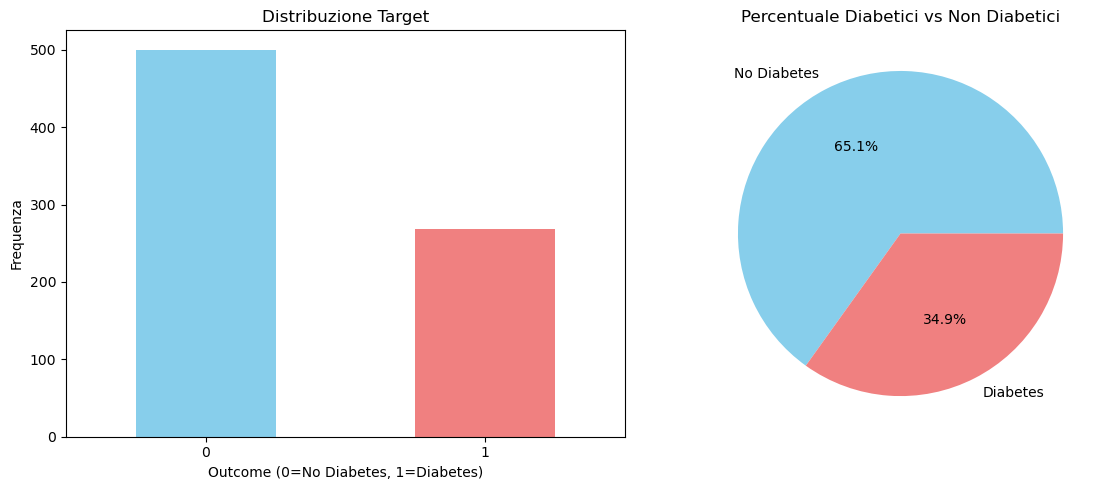


Distribuzione delle features:


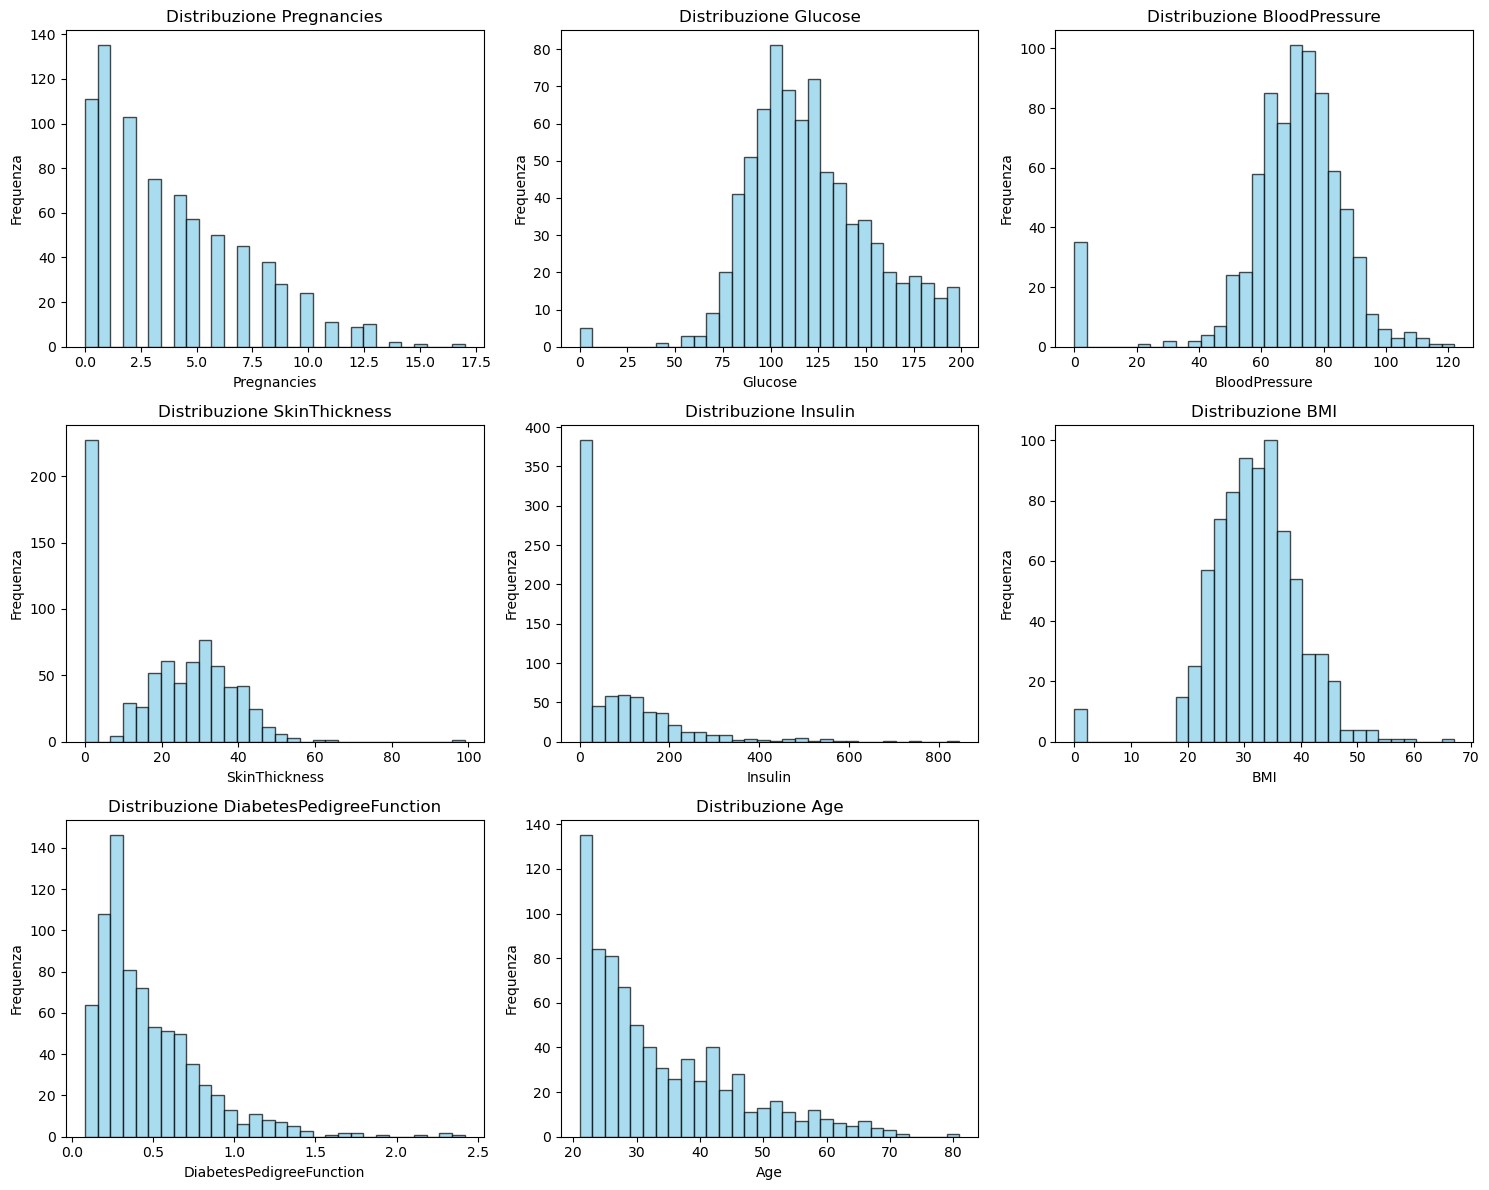


Analisi Outliers:


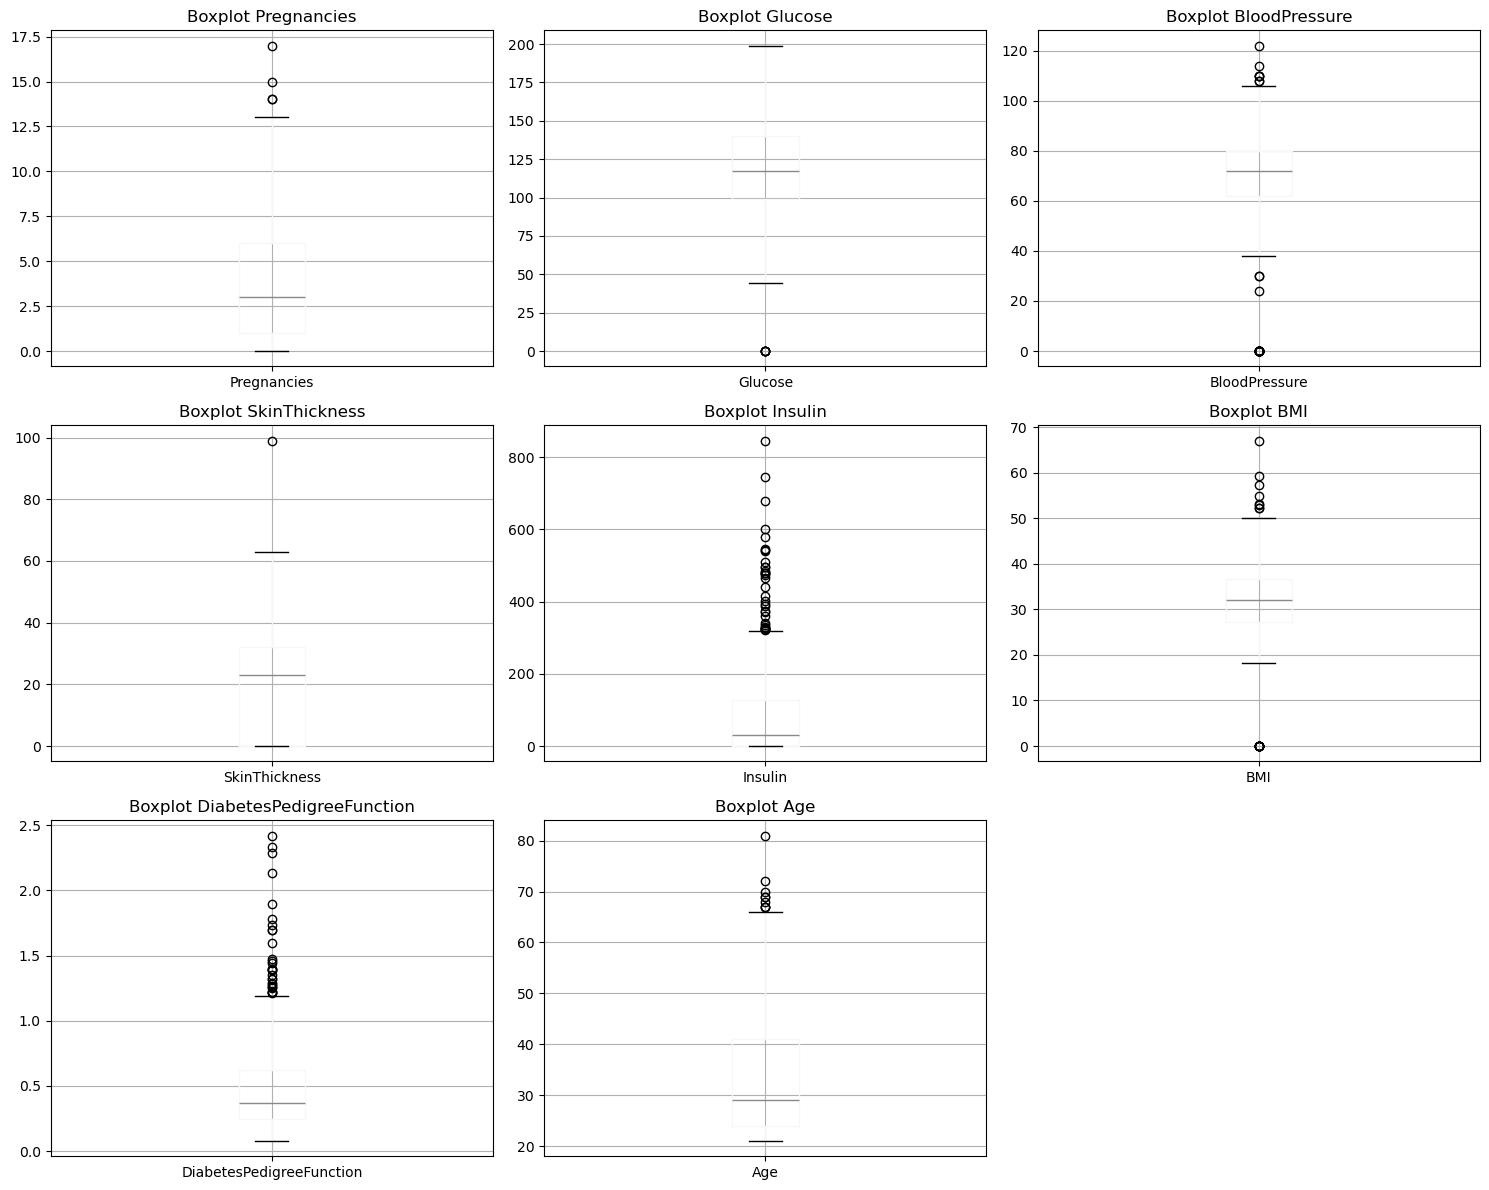


Matrice di Correlazione:


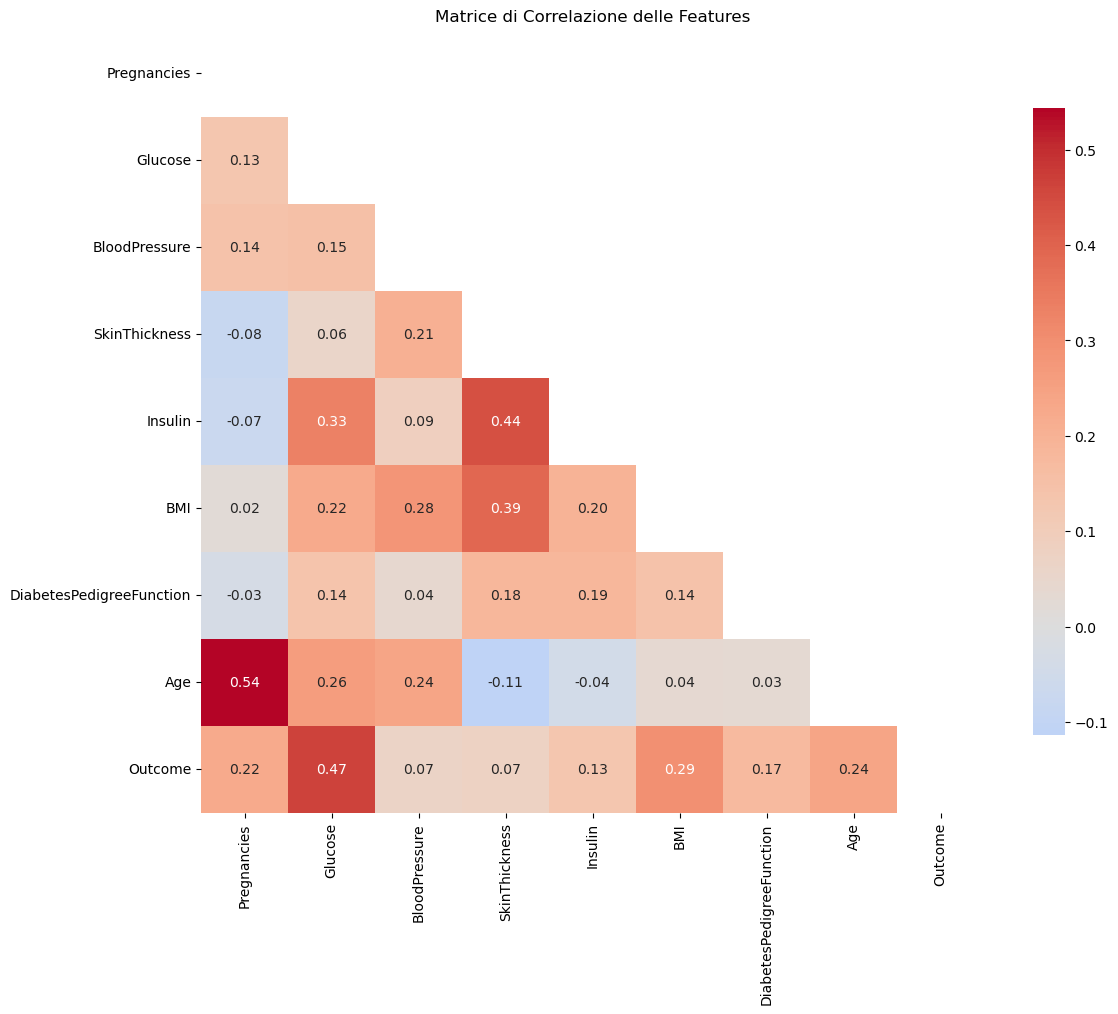


Correlazioni con il Target (Outcome):
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64

Comparativo Diabetici vs Non Diabetici:
                          Non_Diabetic_Mean  Diabetic_Mean  Difference
Insulin                           68.792000     100.335821   31.543821
Glucose                          109.980000     141.257463   31.277463
Age                               31.190000      37.067164    5.877164
BMI                               30.304200      35.142537    4.838337
BloodPressure                     68.184000      70.824627    2.640627
SkinThickness                     19.664000      22.164179    2.500179
Pregnancies                        3.298000       4.865672    1.567672
DiabetesPedigreeFunction  

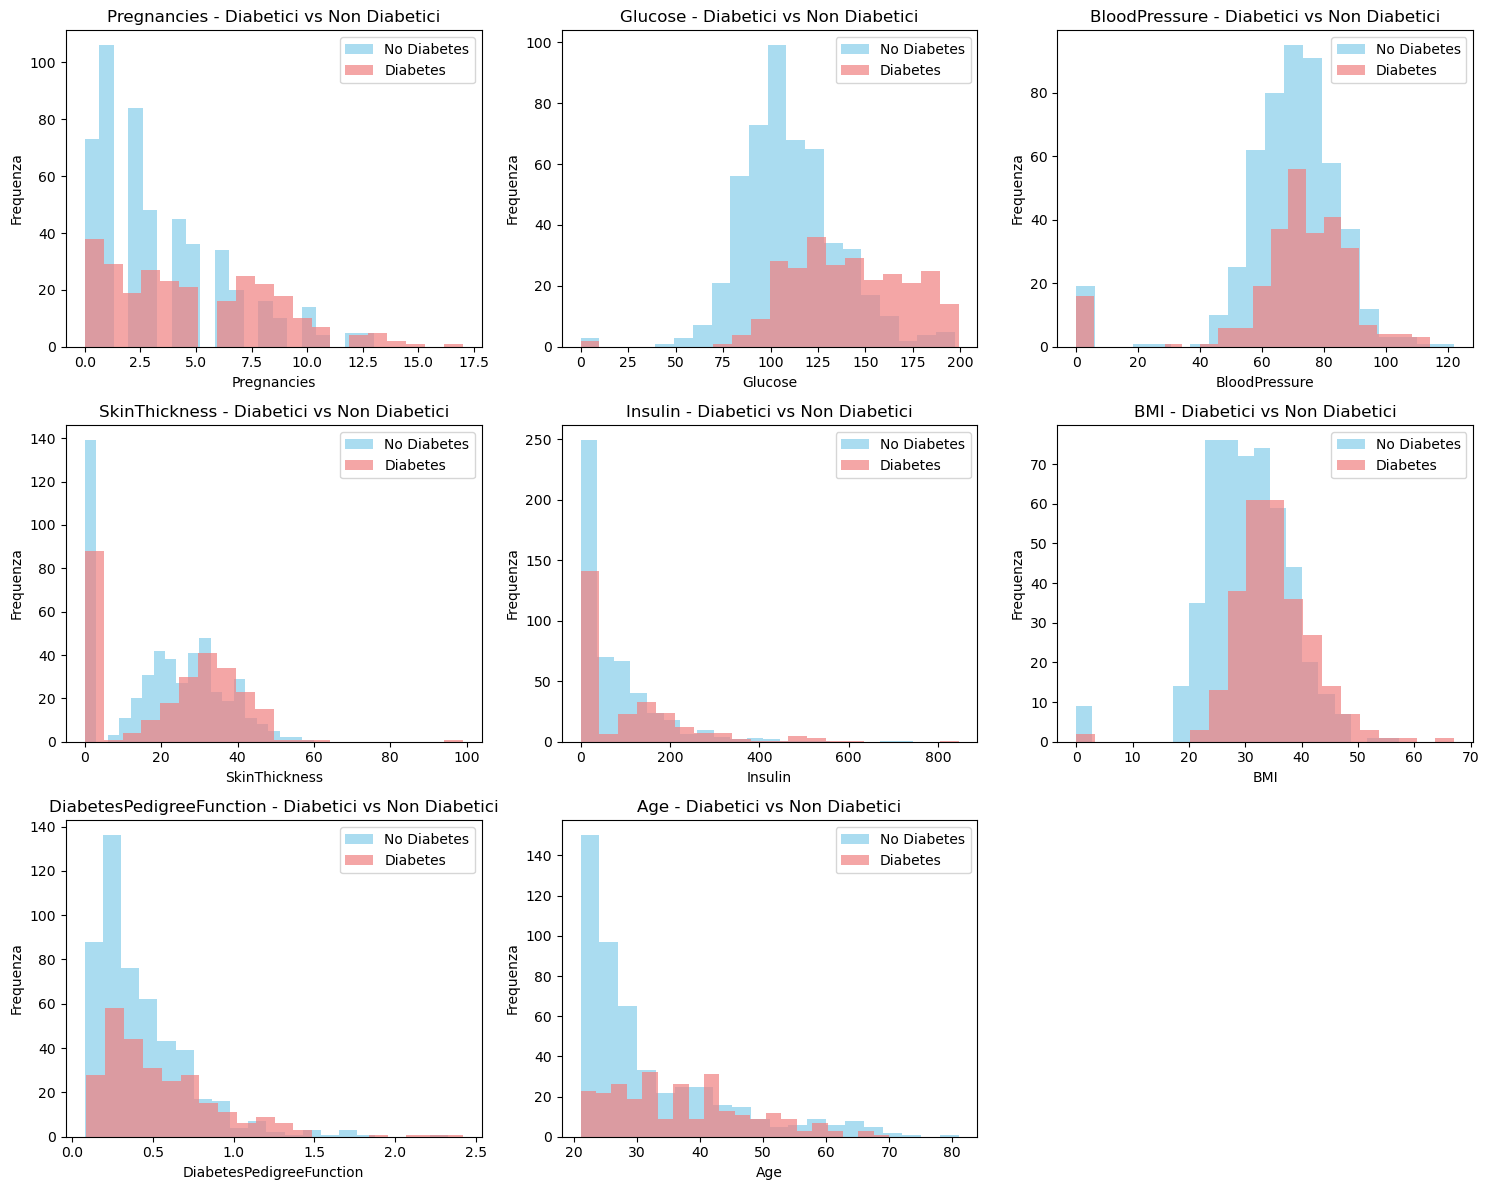


3. FEATURE ENGINEERING
------------------------------
Features originali: 9
Features dopo engineering: 28
Nuove features: ['Glucose_risk', 'Glucose_very_high', 'Glucose_normal', 'BMI_obese', 'BMI_overweight', 'BMI_normal', 'Age_high_risk', 'Age_very_high_risk', 'Age_young', 'BP_high', 'BP_very_high', 'BP_normal', 'Insulin_high', 'Insulin_very_low', 'Glucose_BMI_risk', 'Glucose_BMI_interaction', 'Age_Glucose_risk', 'Age_Glucose_interaction', 'Pregnancy_Age_risk']

4. PREPARAZIONE DATI
------------------------------
Training set: (614, 27)
Test set: (154, 27)
Prima di SMOTE - Classe 0: 400, Classe 1: 214
Dopo SMOTE - Classe 0: 400, Classe 1: 320

5. TRAINING RANDOM FOREST OTTIMIZZATO
------------------------------
Training in corso...

6. VALUTAZIONE DEL MODELLO
------------------------------
RISULTATI CON SOGLIA STANDARD (0.5):
Accuratezza Training: 1.0000
Accuratezza Test: 0.7857
AUC Score: 0.8348
CV Score medio: 0.7889 (+/- 0.1034)

Classification Report (Soglia 0.5):
              p

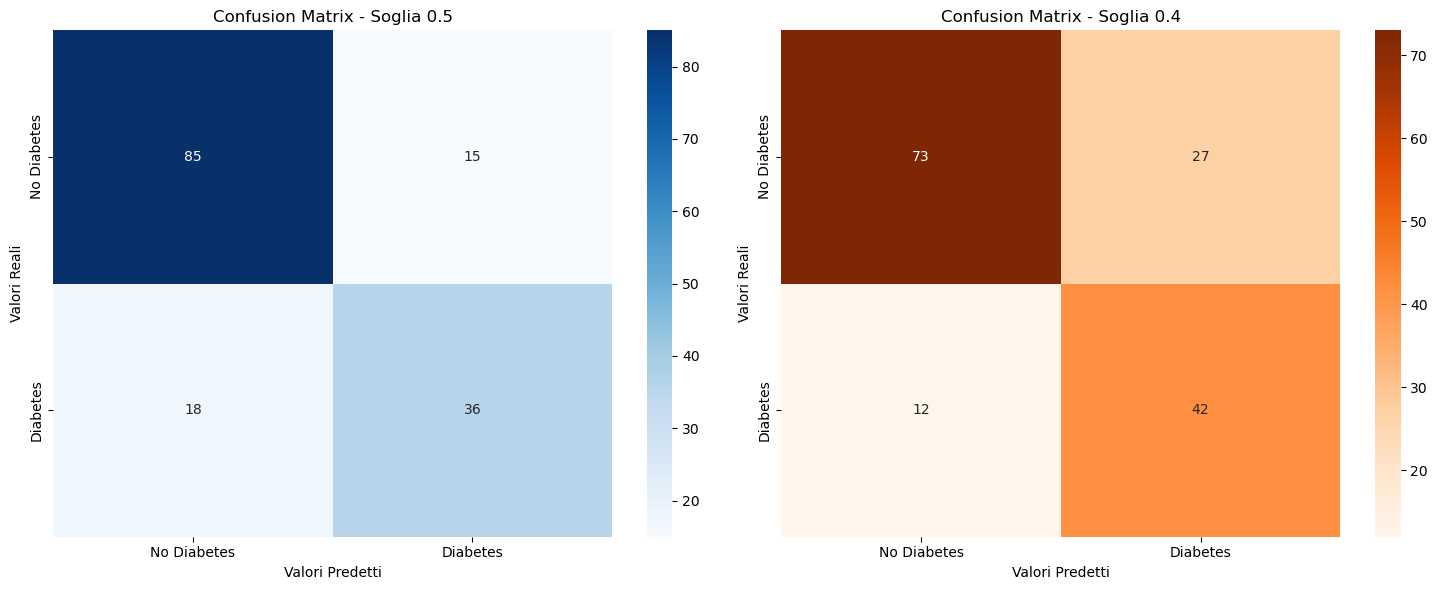

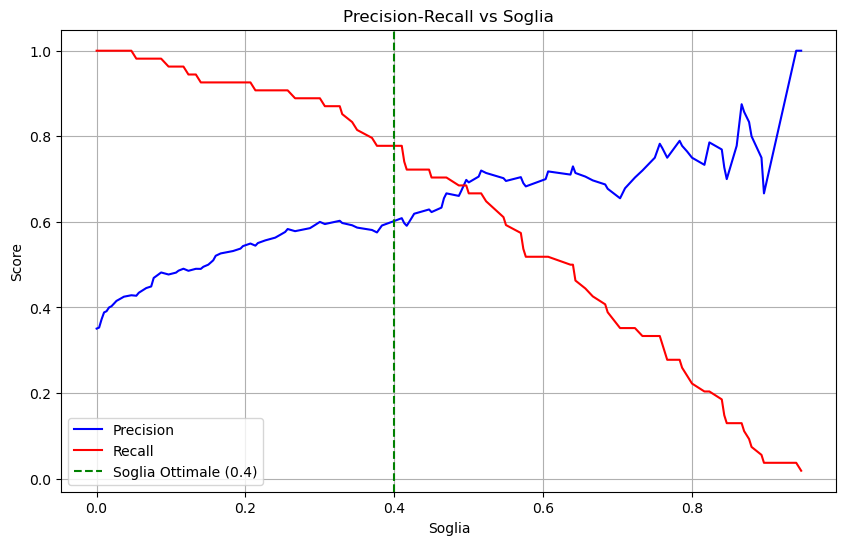


Top 15 Feature più Importanti:
                     feature  importance
23   Glucose_BMI_interaction    0.148244
25   Age_Glucose_interaction    0.115685
1                    Glucose    0.108078
6   DiabetesPedigreeFunction    0.089496
5                        BMI    0.088898
7                        Age    0.068540
2              BloodPressure    0.052999
0                Pregnancies    0.047533
3              SkinThickness    0.043444
22          Glucose_BMI_risk    0.041236
4                    Insulin    0.037310
8               Glucose_risk    0.031002
10            Glucose_normal    0.023515
16                 Age_young    0.023105
11                 BMI_obese    0.014344


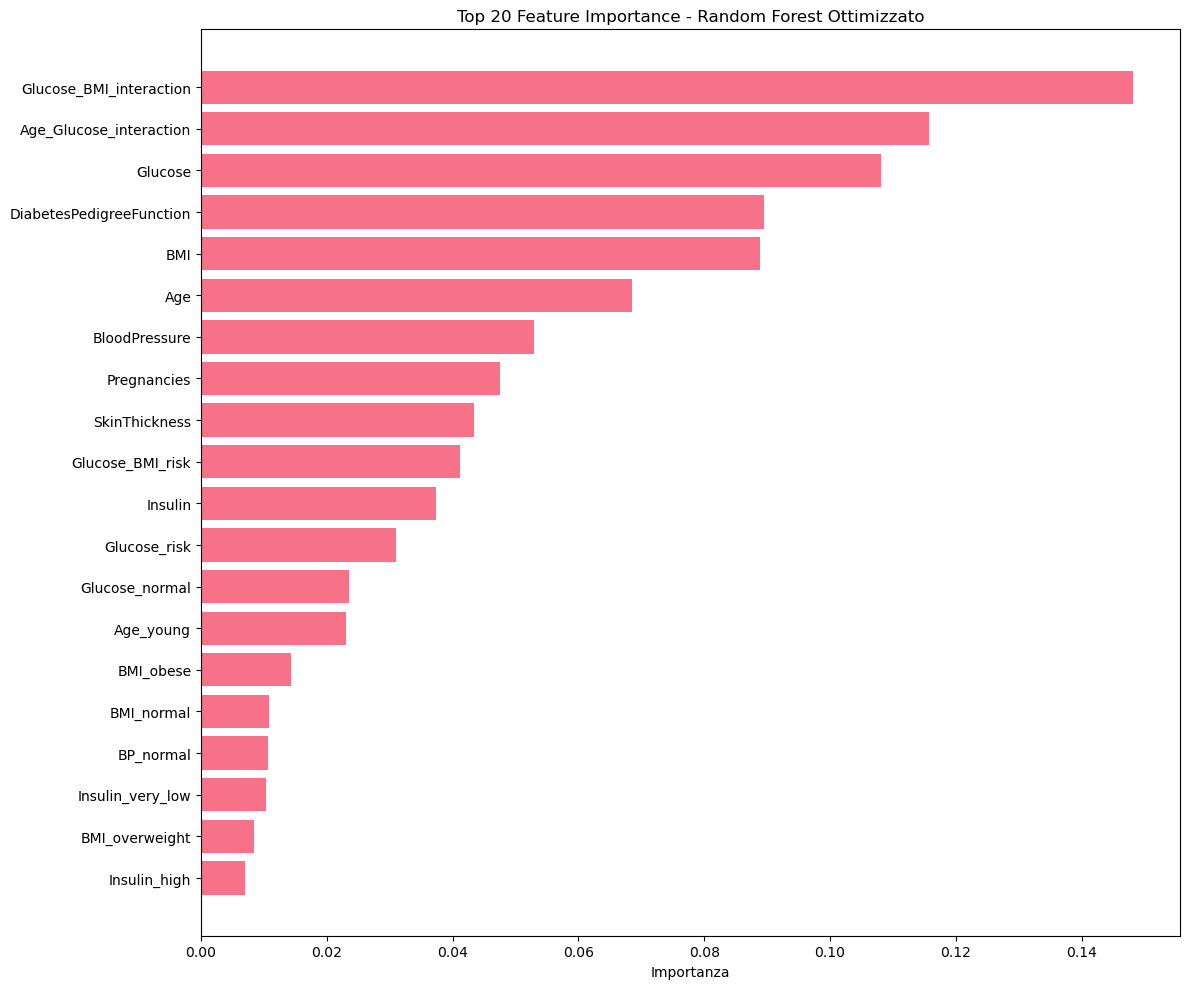


7. GRID SEARCH OPZIONALE
------------------------------
Esecuzione Grid Search ottimizzato... (può richiedere alcuni minuti)
Fitting 3 folds for each of 108 candidates, totalling 324 fits
Migliori parametri: {'class_weight': {0: 1, 1: 2.5}, 'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}
Miglior CV recall: 0.7906

Risultati con parametri ottimali:
Accuratezza (soglia 0.5): 0.7597
Accuratezza (soglia 0.4): 0.7468

Classification Report (migliori parametri, soglia 0.4):
              precision    recall  f1-score   support

           0       0.90      0.69      0.78       100
           1       0.60      0.85      0.70        54

    accuracy                           0.75       154
   macro avg       0.75      0.77      0.74       154
weighted avg       0.79      0.75      0.75       154


8. FUNZIONE DI PREDIZIONE MIGLIORATA
------------------------------

Esempi di utilizzo della funzione di predizione migliorata:
Caso 1 - Profilo a basso rischio

In [6]:
# CODICE COMPLETO: DIABETES PREDICTION CON RANDOM FOREST OTTIMIZZATO
# Include: EDA Completa + Modello Migliorato + Funzione Predizione + Ottimizzazioni

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, precision_recall_curve
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Configurazione per i grafici
plt.style.use('default')
sns.set_palette("husl")

print("="*60)
print("DIABETES PREDICTION - RANDOM FOREST ANALYSIS OTTIMIZZATO")
print("="*60)

# 1. CARICAMENTO DATI
print("\n1. CARICAMENTO DATI")
print("-" * 30)

# Sostituisci con il path del tuo file
df = pd.read_csv('diabetes.csv')  # <-- CAMBIA QUESTO PATH

print(f"Dataset shape: {df.shape}")
print(f"Features: {list(df.columns)}")

# 2. EXPLORATORY DATA ANALYSIS (EDA)
print("\n2. EXPLORATORY DATA ANALYSIS")
print("-" * 30)

# Informazioni generali sul dataset
print("\nInformazioni generali:")
print(df.info())

print("\nStatistiche descrittive:")
print(df.describe())

# Controllo valori mancanti
print(f"\nValori mancanti per colonna:")
print(df.isnull().sum())

# Target distribution
print(f"\nDistribuzione target (Outcome):")
target_counts = df['Outcome'].value_counts()
print(target_counts)
print(f"Percentuale diabetici: {target_counts[1]/len(df)*100:.1f}%")

# Visualizzazione distribuzione target
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Grafico a barre
target_counts.plot(kind='bar', ax=ax1, color=['skyblue', 'lightcoral'])
ax1.set_title('Distribuzione Target')
ax1.set_xlabel('Outcome (0=No Diabetes, 1=Diabetes)')
ax1.set_ylabel('Frequenza')
ax1.tick_params(axis='x', rotation=0)

# Grafico a torta
ax2.pie(target_counts.values, labels=['No Diabetes', 'Diabetes'],
        autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
ax2.set_title('Percentuale Diabetici vs Non Diabetici')

plt.tight_layout()
plt.show()

# Distribuzione delle features numeriche
print("\nDistribuzione delle features:")
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.ravel()

features = df.columns[:-1]  # Tutte tranne 'Outcome'

for i, feature in enumerate(features):
    if i < len(axes):
        # Istogramma
        axes[i].hist(df[feature], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
        axes[i].set_title(f'Distribuzione {feature}')
        axes[i].set_xlabel(feature)
        axes[i].set_ylabel('Frequenza')

# Rimuovi subplot vuoti se necessario
for i in range(len(features), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

# Boxplot per identificare outliers
print("\nAnalisi Outliers:")
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.ravel()

for i, feature in enumerate(features):
    if i < len(axes):
        df.boxplot(column=feature, ax=axes[i])
        axes[i].set_title(f'Boxplot {feature}')

# Rimuovi subplot vuoti se necessario
for i in range(len(features), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

# Matrice di correlazione
print("\nMatrice di Correlazione:")
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', center=0,
            square=True, fmt='.2f', cbar_kws={"shrink": .8})
plt.title('Matrice di Correlazione delle Features')
plt.tight_layout()
plt.show()

# Top correlazioni con il target
print("\nCorrelazioni con il Target (Outcome):")
target_corr = df.corr()['Outcome'].abs().sort_values(ascending=False)[1:]  # Escludi la correlazione con se stesso
print(target_corr)

# Analisi per diabetici vs non diabetici
print("\nComparativo Diabetici vs Non Diabetici:")
diabetic = df[df['Outcome'] == 1]
non_diabetic = df[df['Outcome'] == 0]

comparison_stats = pd.DataFrame({
    'Non_Diabetic_Mean': non_diabetic.drop('Outcome', axis=1).mean(),
    'Diabetic_Mean': diabetic.drop('Outcome', axis=1).mean(),
    'Difference': diabetic.drop('Outcome', axis=1).mean() - non_diabetic.drop('Outcome', axis=1).mean()
})
print(comparison_stats.sort_values('Difference', key=abs, ascending=False))

# Visualizzazione comparativa
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.ravel()

for i, feature in enumerate(features):
    if i < len(axes):
        # Istogramma sovrapposto
        axes[i].hist(non_diabetic[feature], bins=20, alpha=0.7, label='No Diabetes', color='skyblue')
        axes[i].hist(diabetic[feature], bins=20, alpha=0.7, label='Diabetes', color='lightcoral')
        axes[i].set_title(f'{feature} - Diabetici vs Non Diabetici')
        axes[i].set_xlabel(feature)
        axes[i].set_ylabel('Frequenza')
        axes[i].legend()

# Rimuovi subplot vuoti se necessario
for i in range(len(features), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

# 3. FEATURE ENGINEERING
print("\n3. FEATURE ENGINEERING")
print("-" * 30)

def add_derived_features(df):
    """Aggiunge feature derivate basate su conoscenze mediche"""
    df_new = df.copy()

    # Categorie di rischio basate su valori medici standard
    if 'Glucose' in df.columns:
        df_new['Glucose_risk'] = (df['Glucose'] > 125).astype(int)
        df_new['Glucose_very_high'] = (df['Glucose'] > 180).astype(int)
        df_new['Glucose_normal'] = (df['Glucose'] <= 100).astype(int)

    if 'BMI' in df.columns:
        df_new['BMI_obese'] = (df['BMI'] > 30).astype(int)
        df_new['BMI_overweight'] = ((df['BMI'] > 25) & (df['BMI'] <= 30)).astype(int)
        df_new['BMI_normal'] = (df['BMI'] <= 25).astype(int)

    if 'Age' in df.columns:
        df_new['Age_high_risk'] = (df['Age'] > 45).astype(int)
        df_new['Age_very_high_risk'] = (df['Age'] > 65).astype(int)
        df_new['Age_young'] = (df['Age'] <= 30).astype(int)

    if 'BloodPressure' in df.columns:
        df_new['BP_high'] = (df['BloodPressure'] > 90).astype(int)
        df_new['BP_very_high'] = (df['BloodPressure'] > 100).astype(int)
        df_new['BP_normal'] = (df['BloodPressure'] <= 80).astype(int)

    if 'Insulin' in df.columns:
        df_new['Insulin_high'] = (df['Insulin'] > 200).astype(int)
        df_new['Insulin_very_low'] = (df['Insulin'] == 0).astype(int)

    # Interazioni medicamente rilevanti
    if 'Glucose' in df.columns and 'BMI' in df.columns:
        df_new['Glucose_BMI_risk'] = df_new['Glucose_risk'] * df_new['BMI_obese']
        df_new['Glucose_BMI_interaction'] = df['Glucose'] * df['BMI'] / 1000

    if 'Age' in df.columns and 'Glucose' in df.columns:
        df_new['Age_Glucose_risk'] = df_new['Age_high_risk'] * df_new['Glucose_risk']
        df_new['Age_Glucose_interaction'] = df['Age'] * df['Glucose'] / 1000

    if 'Pregnancies' in df.columns and 'Age' in df.columns:
        df_new['Pregnancy_Age_risk'] = (df['Pregnancies'] > 3) * df_new['Age_high_risk']

    return df_new

# Applica feature engineering
df_enhanced = add_derived_features(df)
print(f"Features originali: {df.shape[1]}")
print(f"Features dopo engineering: {df_enhanced.shape[1]}")
print(f"Nuove features: {list(df_enhanced.columns[len(df.columns):])}")

# 4. PREPARAZIONE DATI PER IL MODELLO
print("\n4. PREPARAZIONE DATI")
print("-" * 30)

# Separazione features e target
X = df_enhanced.drop('Outcome', axis=1)
y = df_enhanced['Outcome']

# Split dei dati
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set: {X_train.shape}")
print(f"Test set: {X_test.shape}")

# Scaling delle features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Applicazione SMOTE più aggressivo
smote = SMOTE(sampling_strategy=0.8, random_state=42)  # Più bilanciamento
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

print(f"Prima di SMOTE - Classe 0: {sum(y_train == 0)}, Classe 1: {sum(y_train == 1)}")
print(f"Dopo SMOTE - Classe 0: {sum(y_train_smote == 0)}, Classe 1: {sum(y_train_smote == 1)}")

# 5. TRAINING RANDOM FOREST OTTIMIZZATO
print("\n5. TRAINING RANDOM FOREST OTTIMIZZATO")
print("-" * 30)

# Random Forest con parametri ottimizzati per recall migliore
rf_optimized = RandomForestClassifier(
    n_estimators=300,          # Più alberi
    max_depth=None,            # Più profondità
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='sqrt',
    random_state=42,
    class_weight={0: 1, 1: 2}, # Penalizza di più errori su diabetici
    n_jobs=-1
)

# Training
print("Training in corso...")
rf_optimized.fit(X_train_smote, y_train_smote)

# 6. VALUTAZIONE DEL MODELLO CON SOGLIA OTTIMIZZATA
print("\n6. VALUTAZIONE DEL MODELLO")
print("-" * 30)

# Predizioni con soglia standard (0.5)
y_train_pred = rf_optimized.predict(X_train_scaled)
y_test_pred = rf_optimized.predict(X_test_scaled)
y_test_proba = rf_optimized.predict_proba(X_test_scaled)[:, 1]

# Predizioni con soglia ottimizzata (0.4 per migliorare recall)
optimal_threshold = 0.4
y_test_pred_optimized = (y_test_proba > optimal_threshold).astype(int)

# Metriche con soglia standard
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)
auc_score = roc_auc_score(y_test, y_test_proba)

print("RISULTATI CON SOGLIA STANDARD (0.5):")
print(f"Accuratezza Training: {train_acc:.4f}")
print(f"Accuratezza Test: {test_acc:.4f}")
print(f"AUC Score: {auc_score:.4f}")

# Cross-validation
cv_scores = cross_val_score(rf_optimized, X_train_smote, y_train_smote, cv=5)
print(f"CV Score medio: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

print(f"\nClassification Report (Soglia 0.5):")
print(classification_report(y_test, y_test_pred))

# Metriche con soglia ottimizzata
test_acc_optimized = accuracy_score(y_test, y_test_pred_optimized)

print(f"\nRISULTATI CON SOGLIA OTTIMIZZATA ({optimal_threshold}):")
print(f"Accuratezza Test: {test_acc_optimized:.4f}")

print(f"\nClassification Report (Soglia {optimal_threshold}):")
print(classification_report(y_test, y_test_pred_optimized))

# Confronto delle confusion matrix
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Confusion Matrix soglia 0.5
cm1 = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues', ax=ax1,
            xticklabels=['No Diabetes', 'Diabetes'],
            yticklabels=['No Diabetes', 'Diabetes'])
ax1.set_title('Confusion Matrix - Soglia 0.5')
ax1.set_ylabel('Valori Reali')
ax1.set_xlabel('Valori Predetti')

# Confusion Matrix soglia ottimizzata
cm2 = confusion_matrix(y_test, y_test_pred_optimized)
sns.heatmap(cm2, annot=True, fmt='d', cmap='Oranges', ax=ax2,
            xticklabels=['No Diabetes', 'Diabetes'],
            yticklabels=['No Diabetes', 'Diabetes'])
ax2.set_title(f'Confusion Matrix - Soglia {optimal_threshold}')
ax2.set_ylabel('Valori Reali')
ax2.set_xlabel('Valori Predetti')

plt.tight_layout()
plt.show()

# Precision-Recall Curve per trovare soglia ottimale
precision, recall, thresholds = precision_recall_curve(y_test, y_test_proba)
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precision[:-1], 'b-', label='Precision')
plt.plot(thresholds, recall[:-1], 'r-', label='Recall')
plt.axvline(x=optimal_threshold, color='g', linestyle='--', label=f'Soglia Ottimale ({optimal_threshold})')
plt.xlabel('Soglia')
plt.ylabel('Score')
plt.title('Precision-Recall vs Soglia')
plt.legend()
plt.grid(True)
plt.show()

# Feature Importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_optimized.feature_importances_
}).sort_values('importance', ascending=False)

print(f"\nTop 15 Feature più Importanti:")
print(feature_importance.head(15))

# Visualizzazione Feature Importance
plt.figure(figsize=(12, 10))
top_features = feature_importance.head(20)
plt.barh(range(len(top_features)), top_features['importance'])
plt.yticks(range(len(top_features)), top_features['feature'])
plt.xlabel('Importanza')
plt.title('Top 20 Feature Importance - Random Forest Ottimizzato')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# 7. GRID SEARCH OPZIONALE
print("\n7. GRID SEARCH OPZIONALE")
print("-" * 30)

risposta = input("Vuoi eseguire Grid Search per parametri ancora più ottimali? (y/n): ")

if risposta.lower() == 'y':
    print("Esecuzione Grid Search ottimizzato... (può richiedere alcuni minuti)")

    param_grid = {
        'n_estimators': [200, 300, 400],
        'max_depth': [15, 20, None],
        'min_samples_split': [2, 3],
        'min_samples_leaf': [1, 2],
        'class_weight': [{0: 1, 1: 1.5}, {0: 1, 1: 2}, {0: 1, 1: 2.5}]
    }

    rf_grid = RandomForestClassifier(random_state=42, n_jobs=-1, max_features='sqrt')
    grid_search = GridSearchCV(
        rf_grid, param_grid,
        cv=3,
        scoring='recall',  # Ottimizza per recall
        n_jobs=-1,
        verbose=1
    )

    grid_search.fit(X_train_smote, y_train_smote)

    print(f"Migliori parametri: {grid_search.best_params_}")
    print(f"Miglior CV recall: {grid_search.best_score_:.4f}")

    # Test con i migliori parametri
    best_rf = grid_search.best_estimator_
    y_test_pred_best = best_rf.predict(X_test_scaled)
    y_test_proba_best = best_rf.predict_proba(X_test_scaled)[:, 1]
    y_test_pred_best_optimized = (y_test_proba_best > optimal_threshold).astype(int)

    print(f"\nRisultati con parametri ottimali:")
    print(f"Accuratezza (soglia 0.5): {accuracy_score(y_test, y_test_pred_best):.4f}")
    print(f"Accuratezza (soglia {optimal_threshold}): {accuracy_score(y_test, y_test_pred_best_optimized):.4f}")
    print(f"\nClassification Report (migliori parametri, soglia {optimal_threshold}):")
    print(classification_report(y_test, y_test_pred_best_optimized))

    # Aggiorna il modello se migliore
    rf_optimized = best_rf

# 8. FUNZIONE DI PREDIZIONE MIGLIORATA
print("\n8. FUNZIONE DI PREDIZIONE MIGLIORATA")
print("-" * 30)

def predict_diabetes_advanced(pregnancies, glucose, blood_pressure, skin_thickness,
                             insulin, bmi, diabetes_pedigree, age, threshold=0.4):
    """
    Predice la probabilità di diabete con soglia ottimizzata

    Parametri:
    - pregnancies: Numero di gravidanze
    - glucose: Livello di glucosio nel sangue
    - blood_pressure: Pressione sanguigna diastolica
    - skin_thickness: Spessore della pelle del tricipite
    - insulin: Livello di insulina
    - bmi: Indice di massa corporea
    - diabetes_pedigree: Funzione pedigree del diabete
    - age: Età
    - threshold: Soglia per la classificazione (default 0.4)

    Ritorna:
    - prediction: 0 (No Diabetes) o 1 (Diabetes)
    - probability: Probabilità di avere il diabete (0-1)
    - risk_level: Livello di rischio (Basso/Moderato/Alto)
    """

    # Crea DataFrame con i valori inseriti
    input_data = pd.DataFrame({
        'Pregnancies': [pregnancies],
        'Glucose': [glucose],
        'BloodPressure': [blood_pressure],
        'SkinThickness': [skin_thickness],
        'Insulin': [insulin],
        'BMI': [bmi],
        'DiabetesPedigreeFunction': [diabetes_pedigree],
        'Age': [age]
    })

    # Applica lo stesso feature engineering
    input_enhanced = add_derived_features(input_data)

    # Assicurati che abbia le stesse colonne del training set
    for col in X.columns:
        if col not in input_enhanced.columns:
            input_enhanced[col] = 0

    # Riordina le colonne come nel training set
    input_enhanced = input_enhanced[X.columns]

    # Scaling
    input_scaled = scaler.transform(input_enhanced)

    # Predizione con soglia ottimizzata
    probability = rf_optimized.predict_proba(input_scaled)[0, 1]
    prediction = (probability > threshold).astype(int)

    # Determina il livello di rischio
    if probability < 0.3:
        risk_level = "BASSO"
    elif probability < 0.7:
        risk_level = "MODERATO"
    else:
        risk_level = "ALTO"

    return prediction, probability, risk_level

# Esempi di utilizzo della funzione migliorata
print("\nEsempi di utilizzo della funzione di predizione migliorata:")
print("Caso 1 - Profilo a basso rischio:")
pred1, prob1, risk1 = predict_diabetes_advanced(
    pregnancies=1, glucose=85, blood_pressure=70, skin_thickness=20,
    insulin=80, bmi=22.5, diabetes_pedigree=0.25, age=25
)
print(f"Predizione: {'Diabete' if pred1 == 1 else 'No Diabete'}")
print(f"Probabilità diabete: {prob1:.2%}")
print(f"Livello di rischio: {risk1}")

print("\nCaso 2 - Profilo ad alto rischio:")
pred2, prob2, risk2 = predict_diabetes_advanced(
    pregnancies=5, glucose=180, blood_pressure=95, skin_thickness=35,
    insulin=200, bmi=35.0, diabetes_pedigree=0.8, age=55
)
print(f"Predizione: {'Diabete' if pred2 == 1 else 'No Diabete'}")
print(f"Probabilità diabete: {prob2:.2%}")
print(f"Livello di rischio: {risk2}")

# 9. FUNZIONE INTERATTIVA MIGLIORATA
def interactive_prediction_advanced():
    """Funzione interattiva migliorata per fare nuove predizioni"""
    print("\n" + "="*60)
    print("PREDIZIONE INTERATTIVA AVANZATA")
    print("="*60)
    print("Inserisci i valori clinici per fare una predizione ottimizzata:")

    try:
        pregnancies = float(input("Numero di gravidanze: "))
        glucose = float(input("Livello di glucosio (mg/dL): "))
        blood_pressure = float(input("Pressione sanguigna diastolica (mmHg): "))
        skin_thickness = float(input("Spessore pelle tricipite (mm): "))
        insulin = float(input("Livello di insulina (mu U/ml): "))
        bmi = float(input("BMI (kg/m²): "))
        diabetes_pedigree = float(input("Funzione pedigree diabete (0-2): "))
        age = float(input("Età (anni): "))

        prediction, probability, risk_level = predict_diabetes_advanced(
            pregnancies, glucose, blood_pressure, skin_thickness,
            insulin, bmi, diabetes_pedigree, age
        )

        print(f"\n{'='*20} RISULTATO OTTIMIZZATO {'='*20}")
        print(f"Predizione: {'🔴 DIABETE' if prediction == 1 else '🟢 NO DIABETE'}")
        print(f"Probabilità diabete: {probability:.2%}")
        print(f"📊 Rischio: {risk_level}")

        # Raccomandazioni basate sul rischio
        if risk_level == "BASSO":
            print("\n💡 Raccomandazioni:")
            print("- Mantieni uno stile di vita sano")
            print("- Controlli periodici di routine")
        elif risk_level == "MODERATO":
            print("\n⚠️ Raccomandazioni:")
            print("- Monitora i livelli di glucosio più frequentemente")
            print("- Considera modifiche alla dieta e all'esercizio")
            print("- Consulta il medico per valutazioni più approfondite")
        else:
            print("\n🚨 Raccomandazioni:")
            print("- Consulta immediatamente un medico")
            print("- Richiedi test diagnostici approfonditi")
            print("- Considera interventi preventivi immediati")

        print("="*60)

    except ValueError:
        print("❌ Errore: Inserire solo valori numerici!")
    except Exception as e:
        print(f"❌ Errore: {str(e)}")

# 10. RIEPILOGO FINALE
print("\n" + "="*60)
print("RIEPILOGO FINALE - MODELLO OTTIMIZZATO")
print("="*60)
print(f"✅ Accuratezza (soglia 0.5): {test_acc:.1%}")
print(f"✅ Accuratezza (soglia {optimal_threshold}): {test_acc_optimized:.1%}")
print(f"✅ AUC Score: {auc_score:.3f}")
print(f"✅ Cross-Validation Score: {cv_scores.mean():.3f}")
print(f"🎯 Numero di alberi: 300")
print(f"⚖️ Class weight: {{0: 1, 1: 2}}")
print(f"🎚️ Soglia ottimizzata: {optimal_threshold}")

# Calcola recall migliorato
from sklearn.metrics import recall_score
recall_standard = recall_score(y_test, y_test_pred, pos_label=1)
recall_optimized = recall_score(y_test, y_test_pred_optimized, pos_label=1)

print(f"\n📈 MIGLIORAMENTO RECALL:")
print(f"Recall diabetici (soglia 0.5): {recall_standard:.1%}")
print(f"Recall diabetici (soglia {optimal_threshold}): {recall_optimized:.1%}")
print(f"Miglioramento: +{(recall_optimized - recall_standard)*100:.1f} punti percentuali")

risposta = input("\nVuoi fare una predizione interattiva avanzata? (y/n): ")
if risposta.lower() == 'y':
    interactive_prediction_advanced()

print("\n🎉 Analisi ottimizzata completata!")
print("Il modello è stato migliorato per ridurre i falsi negativi (diabetici non rilevati).")

Dataset di test creato con outliers e valori mancanti
Shape: (100, 4)
Valori mancanti: 7

PREPROCESSING COMPLETO

GESTIONE VALORI MANCANTI
Valori mancanti per colonna:
    Colonna  Valori_Mancanti  Percentuale
0  Feature1                4          4.0
2  Feature3                3          3.0
✅ Valori mancanti imputati con la mediana
Dataset finale: (100, 4)

GESTIONE OUTLIERS
Outliers rilevati per colonna:
Feature1: 3 outliers (3.0%)
Feature2: 2 outliers (2.0%)
Feature3: 2 outliers (2.0%)
Target: 0 outliers (0.0%)
✅ Feature1: Outliers limitati tra 32.73 e 64.81
✅ Feature2: Outliers limitati tra 12.90 e 29.33
✅ Feature3: Outliers limitati tra 77.14 e 126.75

Dataset originale: (100, 4)
Dataset dopo gestione outliers: (100, 4)

Visualizzazione dell'effetto del preprocessing:


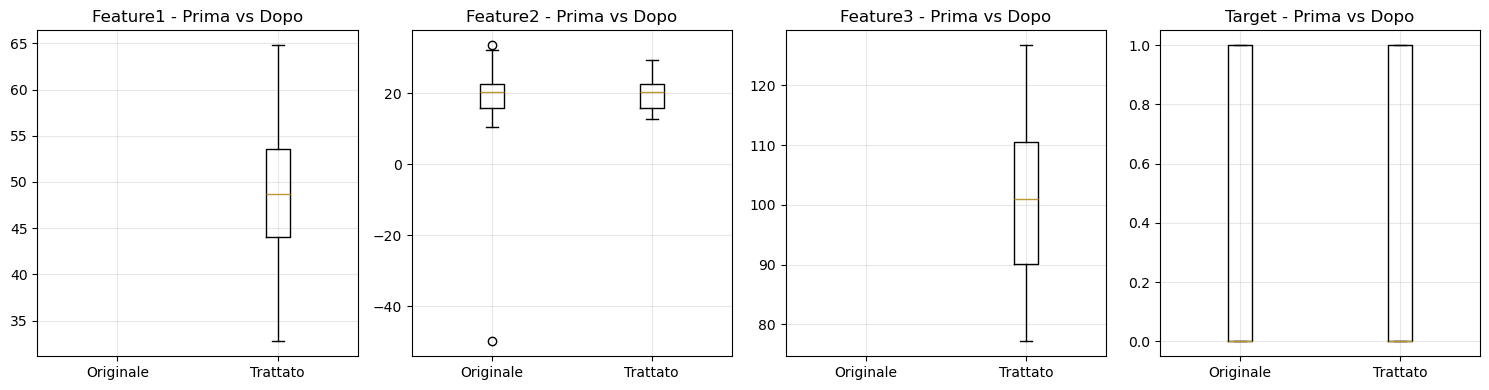


RIEPILOGO PREPROCESSING
Dataset originale: (100, 4)
Dataset finale: (100, 4)
Righe rimosse: 0
Strategia valori mancanti: median
Metodo outliers: cap

✅ Preprocessing completato!


In [7]:
# GESTIONE MIGLIORATA DI OUTLIERS E VALORI MANCANTI
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.impute import SimpleImputer, KNNImputer
import matplotlib.pyplot as plt
import seaborn as sns

def handle_missing_values(df, strategy='median'):
    """
    Gestisce i valori mancanti nel dataset

    Strategie:
    - 'median': Imputa con la mediana (migliore per distribuzioni skewed)
    - 'mean': Imputa con la media
    - 'knn': Imputa usando K-Nearest Neighbors
    - 'drop': Rimuove le righe con valori mancanti
    """
    print(f"\n{'='*50}")
    print("GESTIONE VALORI MANCANTI")
    print(f"{'='*50}")

    # Verifica valori mancanti
    missing_counts = df.isnull().sum()
    missing_percent = (missing_counts / len(df)) * 100

    missing_df = pd.DataFrame({
        'Colonna': missing_counts.index,
        'Valori_Mancanti': missing_counts.values,
        'Percentuale': missing_percent.values
    }).sort_values('Percentuale', ascending=False)

    print("Valori mancanti per colonna:")
    print(missing_df[missing_df['Valori_Mancanti'] > 0])

    if missing_counts.sum() == 0:
        print("✅ Nessun valore mancante trovato!")
        return df

    df_clean = df.copy()

    if strategy == 'drop':
        df_clean = df_clean.dropna()
        print(f"Righe rimosse: {len(df) - len(df_clean)}")

    elif strategy == 'median':
        # Imputa con mediana per features numeriche
        numeric_cols = df_clean.select_dtypes(include=[np.number]).columns
        imputer = SimpleImputer(strategy='median')
        df_clean[numeric_cols] = imputer.fit_transform(df_clean[numeric_cols])
        print("✅ Valori mancanti imputati con la mediana")

    elif strategy == 'mean':
        numeric_cols = df_clean.select_dtypes(include=[np.number]).columns
        imputer = SimpleImputer(strategy='mean')
        df_clean[numeric_cols] = imputer.fit_transform(df_clean[numeric_cols])
        print("✅ Valori mancanti imputati con la media")

    elif strategy == 'knn':
        # KNN Imputer - più sofisticato
        numeric_cols = df_clean.select_dtypes(include=[np.number]).columns
        imputer = KNNImputer(n_neighbors=5)
        df_clean[numeric_cols] = imputer.fit_transform(df_clean[numeric_cols])
        print("✅ Valori mancanti imputati con KNN")

    print(f"Dataset finale: {df_clean.shape}")
    return df_clean

def detect_outliers_iqr(df, columns=None, factor=1.5):
    """
    Rileva outliers usando il metodo IQR (Interquartile Range)
    """
    if columns is None:
        columns = df.select_dtypes(include=[np.number]).columns

    outliers_info = {}

    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - factor * IQR
        upper_bound = Q3 + factor * IQR

        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

        outliers_info[col] = {
            'count': len(outliers),
            'percentage': (len(outliers) / len(df)) * 100,
            'lower_bound': lower_bound,
            'upper_bound': upper_bound,
            'outlier_indices': outliers.index.tolist()
        }

    return outliers_info

def detect_outliers_zscore(df, columns=None, threshold=3):
    """
    Rileva outliers usando Z-score
    """
    if columns is None:
        columns = df.select_dtypes(include=[np.number]).columns

    outliers_info = {}

    for col in columns:
        z_scores = np.abs(stats.zscore(df[col]))
        outliers = df[z_scores > threshold]

        outliers_info[col] = {
            'count': len(outliers),
            'percentage': (len(outliers) / len(df)) * 100,
            'threshold': threshold,
            'outlier_indices': outliers.index.tolist()
        }

    return outliers_info

def handle_outliers(df, method='cap', detection='iqr', columns=None):
    """
    Gestisce gli outliers nel dataset

    Metodi di gestione:
    - 'cap': Limita gli outliers ai valori soglia (winsorizing)
    - 'remove': Rimuove le righe con outliers
    - 'transform': Applica trasformazione logaritmica
    - 'keep': Mantiene gli outliers (solo per confronto)

    Metodi di rilevamento:
    - 'iqr': Interquartile Range
    - 'zscore': Z-score
    """
    print(f"\n{'='*50}")
    print("GESTIONE OUTLIERS")
    print(f"{'='*50}")

    if columns is None:
        columns = df.select_dtypes(include=[np.number]).columns
        # Esclude la variabile target se presente
        if 'Outcome' in columns:
            columns = columns.drop('Outcome')

    df_clean = df.copy()

    # Rileva outliers
    if detection == 'iqr':
        outliers_info = detect_outliers_iqr(df, columns)
    else:
        outliers_info = detect_outliers_zscore(df, columns)

    # Mostra statistiche outliers
    print("Outliers rilevati per colonna:")
    for col, info in outliers_info.items():
        print(f"{col}: {info['count']} outliers ({info['percentage']:.1f}%)")

    if method == 'keep':
        print("✅ Outliers mantenuti (nessuna modifica)")
        return df_clean, outliers_info

    # Gestisci outliers
    for col in columns:
        if outliers_info[col]['count'] > 0:

            if method == 'cap':
                # Winsorizing - limita ai percentili 5° e 95°
                lower_cap = df[col].quantile(0.05)
                upper_cap = df[col].quantile(0.95)

                df_clean[col] = df_clean[col].clip(lower=lower_cap, upper=upper_cap)
                print(f"✅ {col}: Outliers limitati tra {lower_cap:.2f} e {upper_cap:.2f}")

            elif method == 'remove':
                # Rimuove righe con outliers
                outlier_indices = outliers_info[col]['outlier_indices']
                df_clean = df_clean.drop(outlier_indices)
                print(f"✅ {col}: {len(outlier_indices)} righe con outliers rimosse")

            elif method == 'transform':
                # Trasformazione logaritmica (solo per valori positivi)
                if (df_clean[col] > 0).all():
                    df_clean[col] = np.log1p(df_clean[col])  # log(1+x) per evitare log(0)
                    print(f"✅ {col}: Applicata trasformazione logaritmica")
                else:
                    print(f"⚠️ {col}: Trasformazione log non applicabile (valori ≤ 0)")

    if method == 'remove':
        df_clean = df_clean.reset_index(drop=True)

    print(f"\nDataset originale: {df.shape}")
    print(f"Dataset dopo gestione outliers: {df_clean.shape}")

    return df_clean, outliers_info

def visualize_outlier_treatment(df_original, df_clean, columns=None):
    """
    Visualizza l'effetto del trattamento degli outliers
    """
    if columns is None:
        columns = df_original.select_dtypes(include=[np.number]).columns
        if 'Outcome' in columns:
            columns = columns.drop('Outcome')

    n_cols = min(4, len(columns))
    n_rows = (len(columns) + n_cols - 1) // n_cols

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4*n_rows))
    if n_rows == 1:
        axes = [axes] if n_cols == 1 else axes
    else:
        axes = axes.ravel()

    for i, col in enumerate(columns):
        if i < len(axes):
            # Boxplot comparativo
            data_to_plot = [df_original[col], df_clean[col]]
            axes[i].boxplot(data_to_plot, labels=['Originale', 'Trattato'])
            axes[i].set_title(f'{col} - Prima vs Dopo')
            axes[i].grid(True, alpha=0.3)

    # Rimuovi subplot vuoti
    for i in range(len(columns), len(axes)):
        fig.delaxes(axes[i])

    plt.tight_layout()
    plt.show()

def comprehensive_preprocessing(df, missing_strategy='median', outlier_method='cap'):
    """
    Preprocessing completo: valori mancanti + outliers
    """
    print(f"\n{'='*60}")
    print("PREPROCESSING COMPLETO")
    print(f"{'='*60}")

    # 1. Gestione valori mancanti
    df_step1 = handle_missing_values(df, strategy=missing_strategy)

    # 2. Gestione outliers
    df_final, outliers_info = handle_outliers(df_step1, method=outlier_method)

    # 3. Visualizzazione comparativa
    if outlier_method != 'keep':
        print("\nVisualizzazione dell'effetto del preprocessing:")
        visualize_outlier_treatment(df, df_final)

    # 4. Statistiche finali
    print(f"\n{'='*30}")
    print("RIEPILOGO PREPROCESSING")
    print(f"{'='*30}")
    print(f"Dataset originale: {df.shape}")
    print(f"Dataset finale: {df_final.shape}")
    print(f"Righe rimosse: {df.shape[0] - df_final.shape[0]}")
    print(f"Strategia valori mancanti: {missing_strategy}")
    print(f"Metodo outliers: {outlier_method}")

    return df_final, outliers_info

# ESEMPIO DI UTILIZZO CON IL DATASET DIABETES
def apply_to_diabetes_data(df):
    """
    Applica il preprocessing al dataset diabetes
    """
    print("Applicazione preprocessing al dataset diabetes...")

    # Nel dataset diabetes, i valori 0 in alcune colonne potrebbero essere valori mancanti
    # Sostituisci 0 con NaN per alcune colonne specifiche
    medical_zero_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

    df_processed = df.copy()

    # Converti 0 in NaN per colonne mediche dove 0 non è realistico
    for col in medical_zero_cols:
        if col in df_processed.columns:
            df_processed[col] = df_processed[col].replace(0, np.nan)

    # Applica preprocessing completo
    df_final, outliers_info = comprehensive_preprocessing(
        df_processed,
        missing_strategy='knn',  # KNN per dati medici
        outlier_method='cap'     # Capping per mantenere i dati
    )

    return df_final, outliers_info

# TEST DELLE FUNZIONI
if __name__ == "__main__":
    # Esempio con dati simulati
    np.random.seed(42)

    # Crea dataset di test con outliers e valori mancanti
    test_data = {
        'Feature1': np.random.normal(50, 10, 100),
        'Feature2': np.random.normal(20, 5, 100),
        'Feature3': np.random.normal(100, 15, 100),
        'Target': np.random.binomial(1, 0.3, 100)
    }

    df_test = pd.DataFrame(test_data)

    # Aggiungi outliers artificiali
    df_test.loc[0, 'Feature1'] = 200  # Outlier estremo
    df_test.loc[1, 'Feature2'] = -50  # Outlier estremo

    # Aggiungi valori mancanti
    df_test.loc[2:5, 'Feature1'] = np.nan
    df_test.loc[6:8, 'Feature3'] = np.nan

    print("Dataset di test creato con outliers e valori mancanti")
    print(f"Shape: {df_test.shape}")
    print(f"Valori mancanti: {df_test.isnull().sum().sum()}")

    # Applica preprocessing
    df_clean, outliers_info = comprehensive_preprocessing(df_test)

    print("\n✅ Preprocessing completato!")

DIABETES PREDICTION - RANDOM FOREST ANALYSIS
Con gestione outliers e missing values

1. CARICAMENTO DATI
------------------------------
Dataset shape: (768, 9)
Features: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

2. EXPLORATORY DATA ANALYSIS
------------------------------

Informazioni generali:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age             

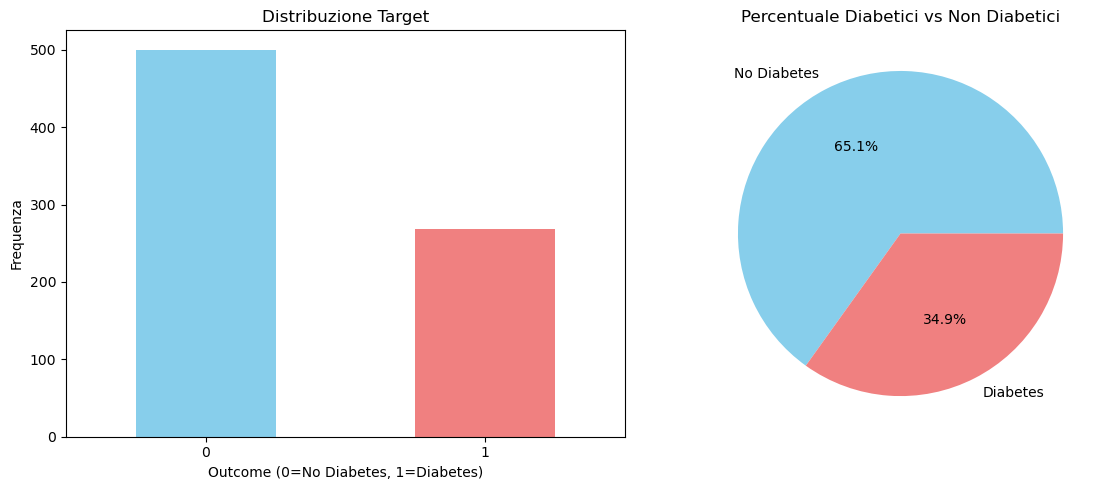


3. GESTIONE VALORI MANCANTI
------------------------------
Sostituzione zeri anomali con NaN...
Glucose: 5 zeri sostituiti con NaN
BloodPressure: 35 zeri sostituiti con NaN
SkinThickness: 227 zeri sostituiti con NaN
Insulin: 374 zeri sostituiti con NaN
BMI: 11 zeri sostituiti con NaN

Valori mancanti dopo la sostituzione:
               Missing_Count  Missing_Percentage
Glucose                    5            0.651042
BloodPressure             35            4.557292
SkinThickness            227           29.557292
Insulin                  374           48.697917
BMI                       11            1.432292

4. IMPUTAZIONE CON RANDOM FOREST
------------------------------
Iniziando imputazione con Random Forest...
✅ Imputazione completata!
Valori mancanti rimanenti: 0

Confronto statistiche prima/dopo imputazione:

Glucose:
  Originale (con zeri): media=120.9, std=32.0
  Dopo imputazione: media=121.6, std=30.5

BloodPressure:
  Originale (con zeri): media=69.1, std=19.4
  Dopo imput

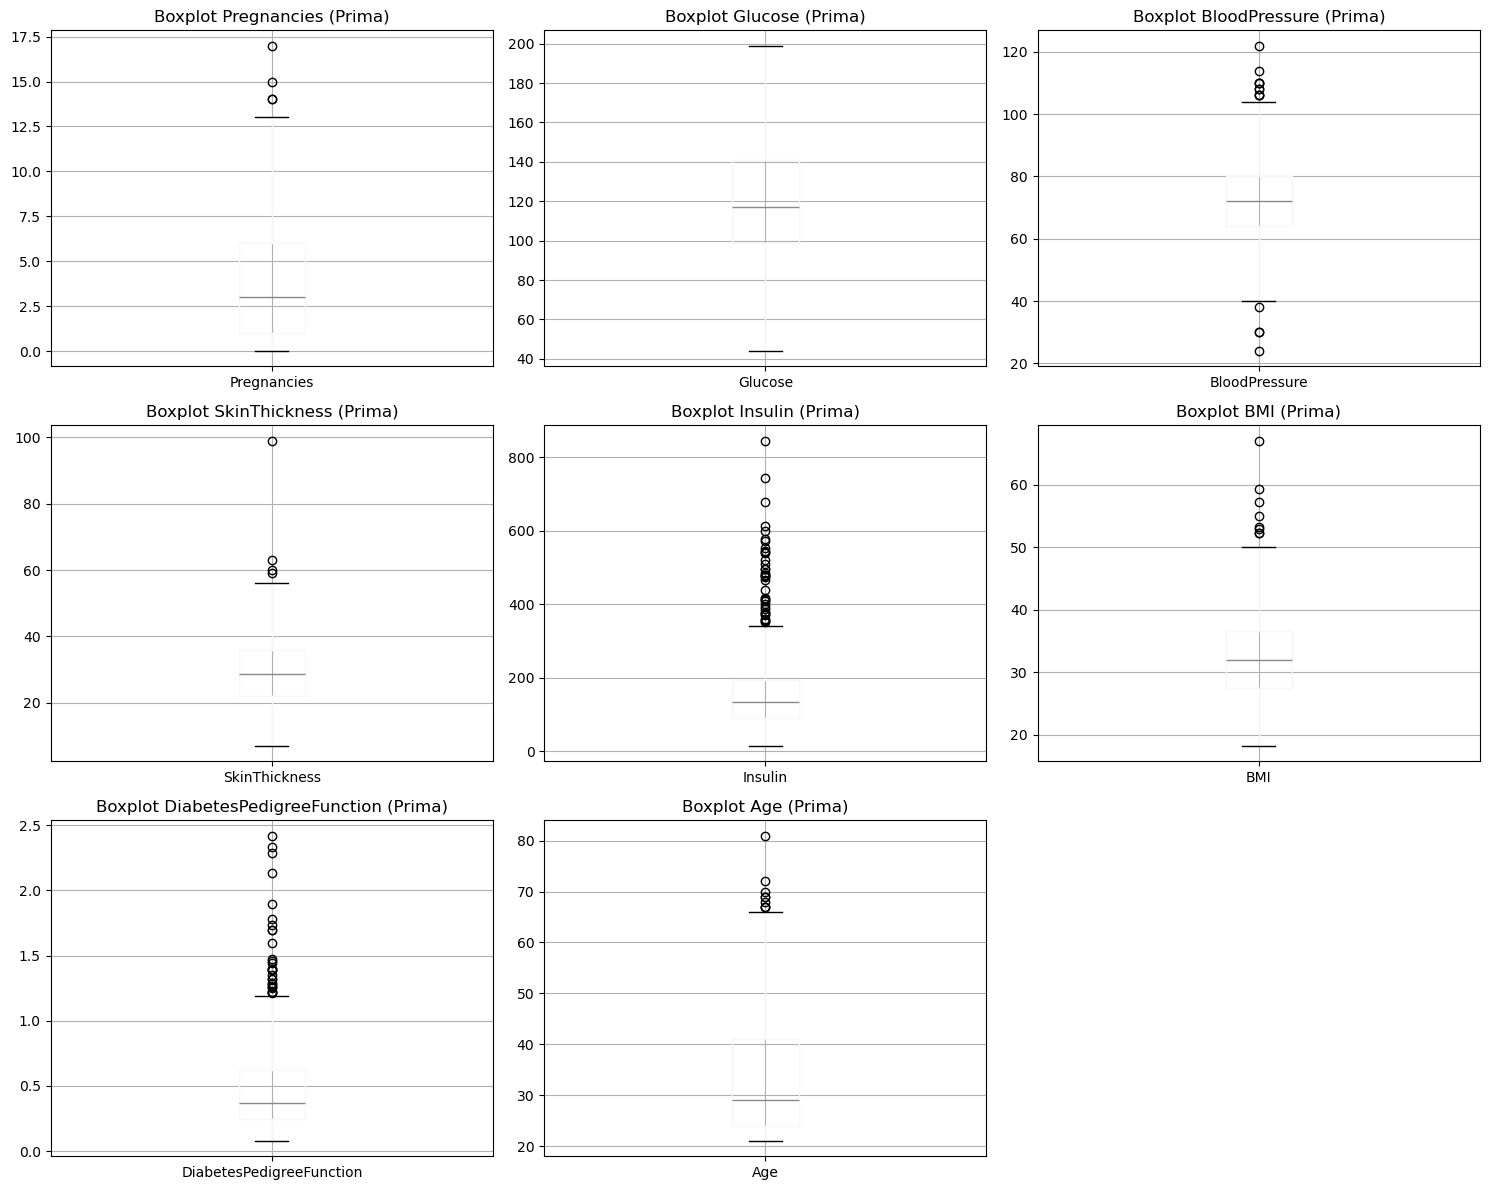

Analizzando outliers per 8 colonne numeriche...
Pregnancies: 4 outliers (0.5%)
  → Outliers cappati ai limiti [-6.5, 13.5]
BloodPressure: 14 outliers (1.8%)
  → Outliers cappati ai limiti [40.0, 104.0]
SkinThickness: 4 outliers (0.5%)
  → Outliers cappati ai limiti [1.0, 57.0]
Insulin: 37 outliers (4.8%)
  → Outliers cappati ai limiti [-67.1, 349.2]
BMI: 8 outliers (1.0%)
  → Outliers cappati ai limiti [13.8, 50.2]
DiabetesPedigreeFunction: 29 outliers (3.8%)
  → Outliers cappati ai limiti [-0.3, 1.2]
Age: 9 outliers (1.2%)
  → Outliers cappati ai limiti [-1.5, 66.5]

Riepilogo outliers gestiti:
Pregnancies: 4 outliers (0.5%) cappati
BloodPressure: 14 outliers (1.8%) cappati
SkinThickness: 4 outliers (0.5%) cappati
Insulin: 37 outliers (4.8%) cappati
BMI: 8 outliers (1.0%) cappati
DiabetesPedigreeFunction: 29 outliers (3.8%) cappati
Age: 9 outliers (1.2%) cappati

Visualizzazione outliers (dopo il trattamento):


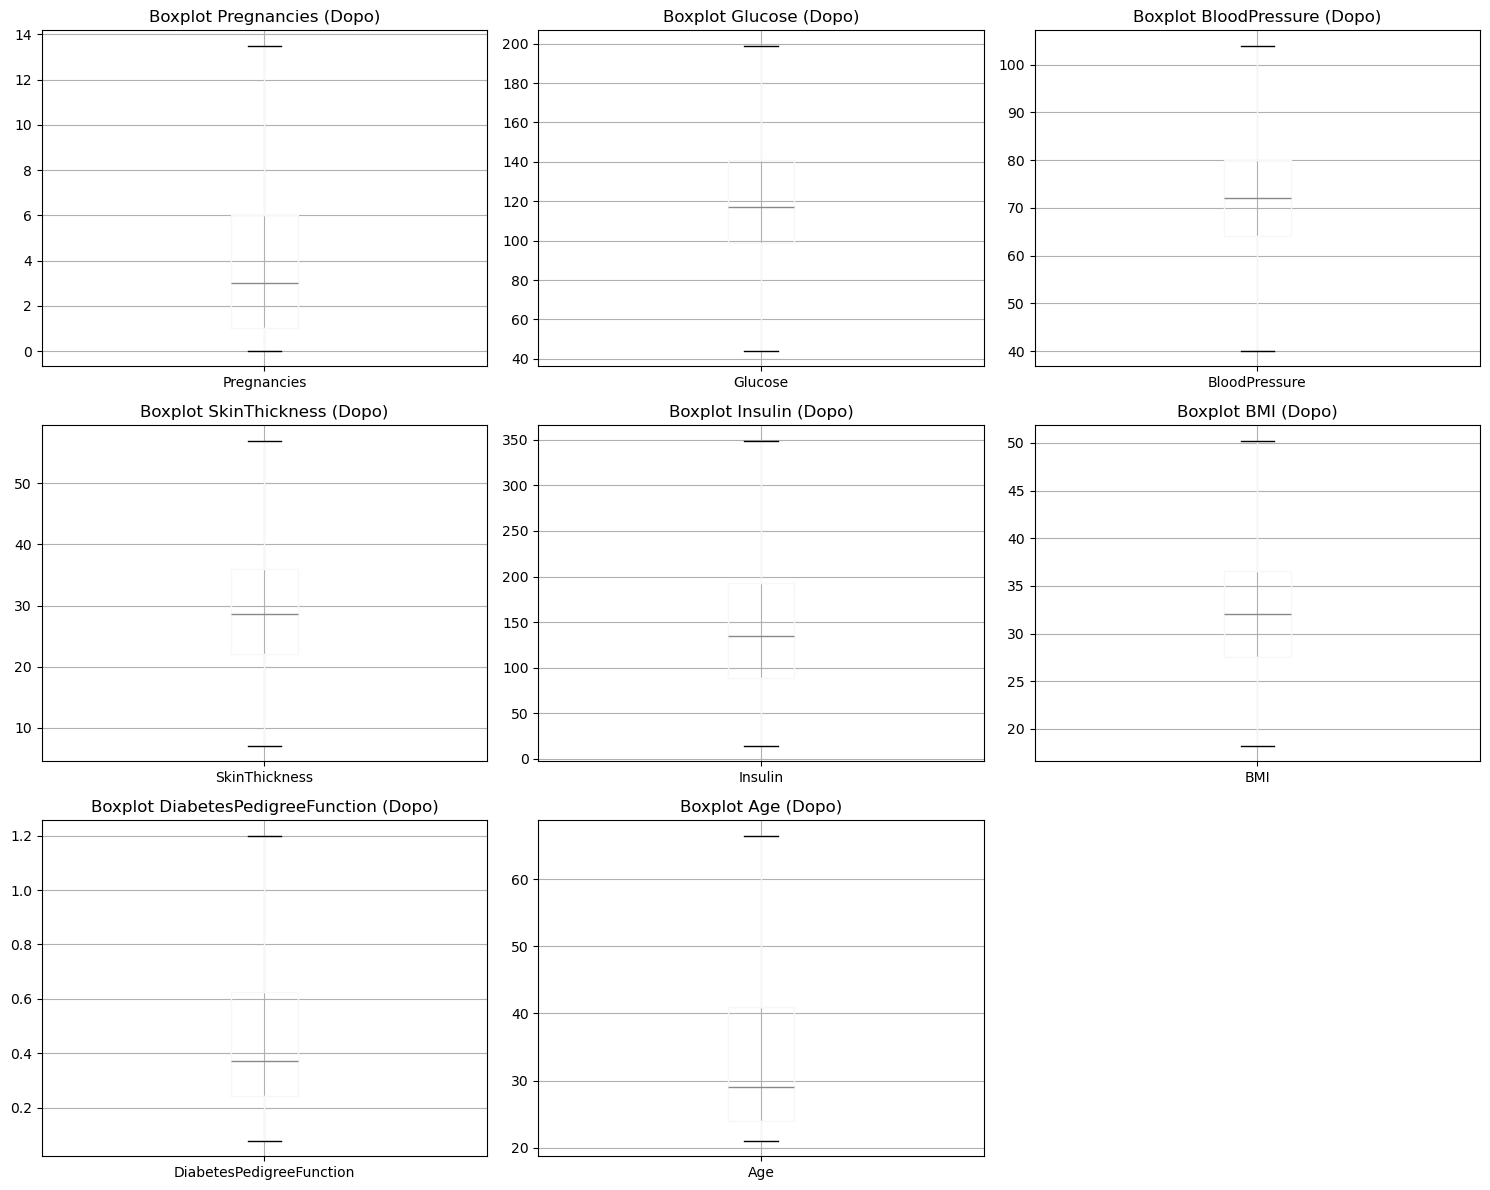


6. ANALISI EDA CON DATI PULITI
------------------------------
Distribuzione delle features dopo pulizia:


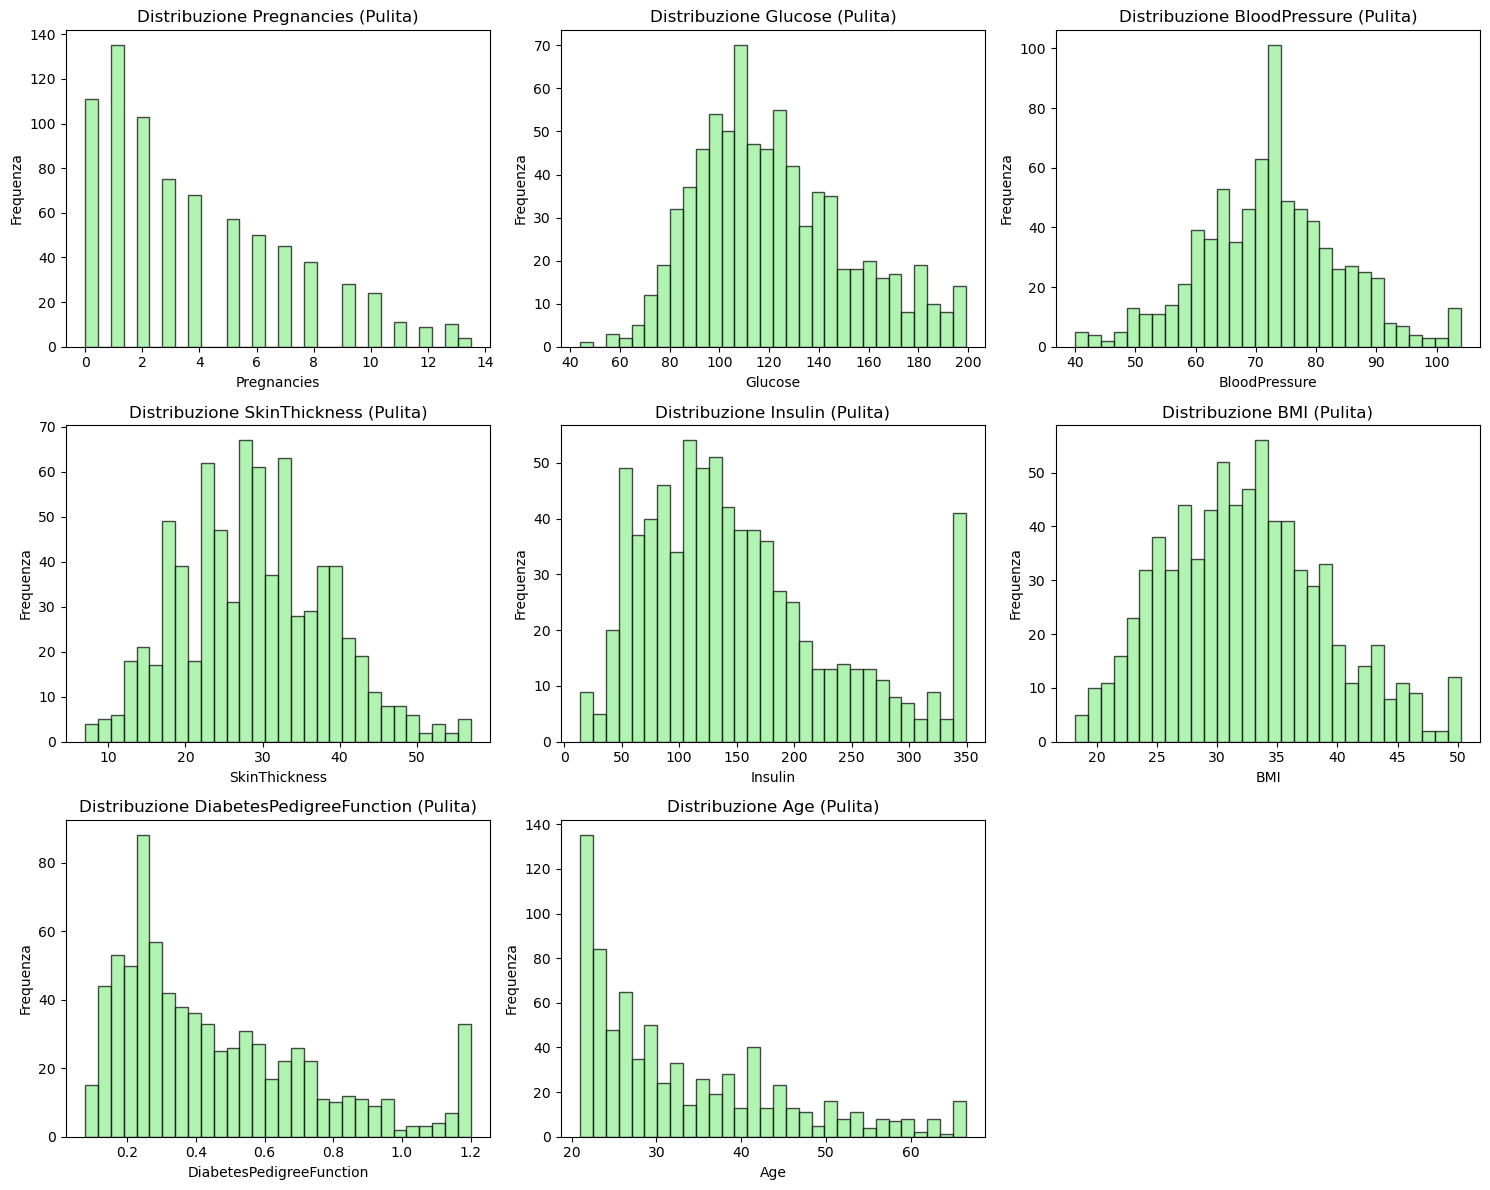

Matrice di Correlazione (dati puliti):


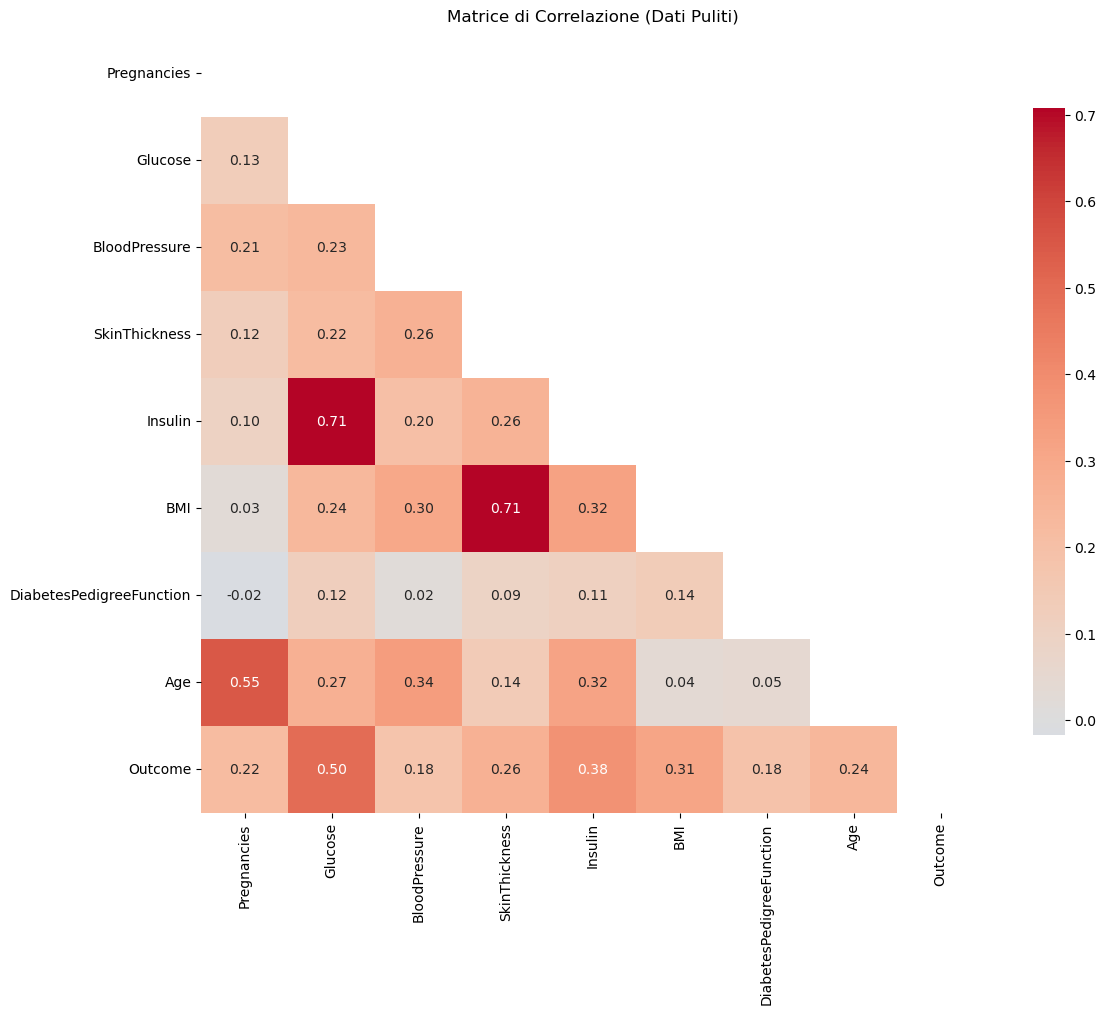

Correlazioni con il Target (dati puliti):
Glucose                     0.495557
Insulin                     0.380194
BMI                         0.313342
SkinThickness               0.262931
Age                         0.242702
Pregnancies                 0.220392
DiabetesPedigreeFunction    0.184969
BloodPressure               0.182400
Name: Outcome, dtype: float64

7. FEATURE ENGINEERING
------------------------------
Features dopo pulizia: 9
Features dopo engineering: 18
Nuove features: ['Glucose_risk', 'Glucose_very_high', 'BMI_obese', 'BMI_overweight', 'Age_high_risk', 'Age_very_high_risk', 'BP_high', 'Glucose_BMI_risk', 'Age_Glucose_risk']

8. PREPARAZIONE DATI
------------------------------
Training set: (614, 17)
Test set: (154, 17)
Prima di SMOTE - Classe 0: 400, Classe 1: 214
Dopo SMOTE - Classe 0: 400, Classe 1: 400

9. TRAINING RANDOM FOREST OTTIMIZZATO
------------------------------
Training in corso...

10. VALUTAZIONE DEL MODELLO
------------------------------
Accuratezza

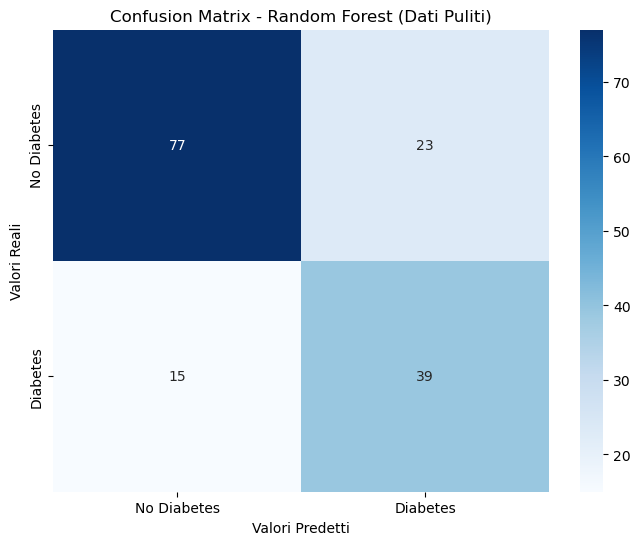


Top 10 Feature più Importanti:
                     feature  importance
1                    Glucose    0.174328
4                    Insulin    0.132592
5                        BMI    0.118507
3              SkinThickness    0.095485
7                        Age    0.090687
6   DiabetesPedigreeFunction    0.089874
2              BloodPressure    0.076111
15          Glucose_BMI_risk    0.067883
0                Pregnancies    0.062562
8               Glucose_risk    0.042009


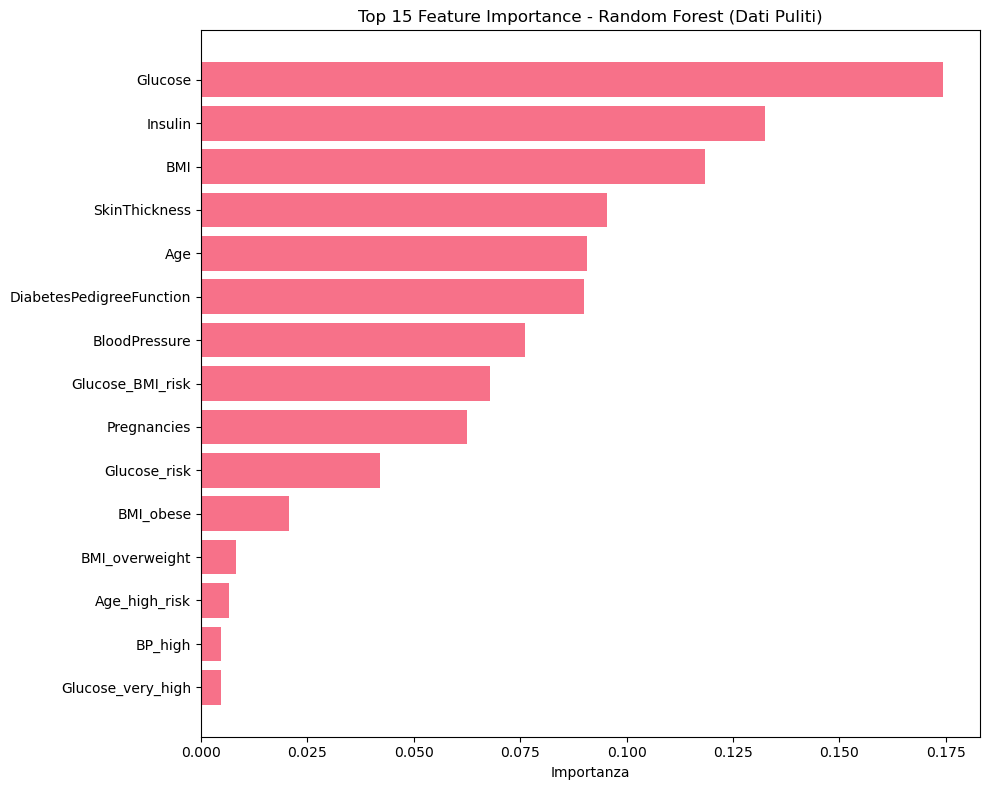


11. FUNZIONE DI PREDIZIONE COMPLETA
------------------------------

Esempio di utilizzo della funzione di predizione completa:

Caso 1 - Profilo a basso rischio:
🔄 Applicando preprocessing...
✅ Preprocessing completato!
Predizione: No Diabete
Probabilità diabete: 0.00%

Caso 2 - Profilo ad alto rischio:
🔄 Applicando preprocessing...
✅ Preprocessing completato!
Predizione: Diabete
Probabilità diabete: 87.50%

Caso 3 - Con valori anomali (0) che verranno gestiti:
🔄 Applicando preprocessing...
⚠️  Valore 0 rilevato per Glucose, sarà imputato
⚠️  Valore 0 rilevato per BloodPressure, sarà imputato
🔧 Applicando imputazione per valori mancanti...
✅ Preprocessing completato!
Predizione: Diabete
Probabilità diabete: 64.00%

RIEPILOGO FINALE - MODELLO OTTIMIZZATO
✅ Accuratezza (soglia 0.5): 75.3%
✅ Accuratezza (soglia 0.4): 74.7%
✅ AUC Score: 0.818
✅ Cross-Validation Score: 0.829
🎯 Numero di alberi: 300
⚖️ Class weight: {0: 1, 1: 2}
🎚️ Soglia ottimizzata: 0.4

📈 MIGLIORAMENTO RECALL:
Recall dia

In [14]:
# CODICE COMPLETO: DIABETES PREDICTION CON RANDOM FOREST
# Include: EDA + Gestione Outliers + Imputazione Missing + Modello Ottimizzato + Funzione Predizione

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Configurazione per i grafici
plt.style.use('default')
sns.set_palette("husl")

print("="*60)
print("DIABETES PREDICTION - RANDOM FOREST ANALYSIS")
print("Con gestione outliers e missing values")
print("="*60)

# 1. CARICAMENTO DATI
print("\n1. CARICAMENTO DATI")
print("-" * 30)

# Sostituisci con il path del tuo file
df = pd.read_csv('diabetes.csv')  # <-- CAMBIA QUESTO PATH

print(f"Dataset shape: {df.shape}")
print(f"Features: {list(df.columns)}")

# 2. EXPLORATORY DATA ANALYSIS (EDA)
print("\n2. EXPLORATORY DATA ANALYSIS")
print("-" * 30)

# Informazioni generali sul dataset
print("\nInformazioni generali:")
print(df.info())

print("\nStatistiche descrittive:")
print(df.describe())

# Controllo valori mancanti e zeri anomali
print(f"\nValori mancanti per colonna:")
print(df.isnull().sum())

# Nel dataset diabetes, alcuni zeri sono in realtà valori mancanti
# (non è possibile avere 0 per glucosio, pressione, BMI, ecc.)
print(f"\nValori zero per colonna (possibili missing):")
zero_counts = (df == 0).sum()
print(zero_counts)

# Identifichiamo le colonne dove 0 non è un valore valido
problematic_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in problematic_zeros:
    if col in df.columns:
        zero_count = (df[col] == 0).sum()
        zero_perc = (zero_count / len(df)) * 100
        print(f"{col}: {zero_count} zeri ({zero_perc:.1f}%)")

# Target distribution
print(f"\nDistribuzione target (Outcome):")
target_counts = df['Outcome'].value_counts()
print(target_counts)
print(f"Percentuale diabetici: {target_counts[1]/len(df)*100:.1f}%")

# Visualizzazione distribuzione target
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Grafico a barre
target_counts.plot(kind='bar', ax=ax1, color=['skyblue', 'lightcoral'])
ax1.set_title('Distribuzione Target')
ax1.set_xlabel('Outcome (0=No Diabetes, 1=Diabetes)')
ax1.set_ylabel('Frequenza')
ax1.tick_params(axis='x', rotation=0)

# Grafico a torta
ax2.pie(target_counts.values, labels=['No Diabetes', 'Diabetes'],
        autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
ax2.set_title('Percentuale Diabetici vs Non Diabetici')

plt.tight_layout()
plt.show()

# 3. GESTIONE VALORI MANCANTI (ZERI ANOMALI)
print("\n3. GESTIONE VALORI MANCANTI")
print("-" * 30)

def handle_missing_values(df):
    """
    Gestisce i valori mancanti sostituendo gli zeri anomali con NaN
    e poi applicando l'imputazione con Random Forest
    """
    df_clean = df.copy()

    # Sostituisci zeri con NaN per le colonne problematiche
    problematic_columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

    print("Sostituzione zeri anomali con NaN...")
    for col in problematic_columns:
        if col in df_clean.columns:
            original_zeros = (df_clean[col] == 0).sum()
            df_clean.loc[df_clean[col] == 0, col] = np.nan
            print(f"{col}: {original_zeros} zeri sostituiti con NaN")

    # Mostra statistiche sui valori mancanti
    print(f"\nValori mancanti dopo la sostituzione:")
    missing_stats = df_clean.isnull().sum()
    missing_perc = (missing_stats / len(df_clean)) * 100
    missing_df = pd.DataFrame({
        'Missing_Count': missing_stats,
        'Missing_Percentage': missing_perc
    })
    print(missing_df[missing_df['Missing_Count'] > 0])

    return df_clean

# Applica gestione missing values
df_with_missing = handle_missing_values(df)

# 4. IMPUTAZIONE DEI VALORI MANCANTI CON RANDOM FOREST
print("\n4. IMPUTAZIONE CON RANDOM FOREST")
print("-" * 30)

def impute_missing_values(df):
    """
    Imputa i valori mancanti usando IterativeImputer con Random Forest
    """
    print("Iniziando imputazione con Random Forest...")

    # Separare features numeriche e target
    features_to_impute = df.drop('Outcome', axis=1)
    target = df['Outcome']

    # Configurare l'imputer con Random Forest
    # IterativeImputer usa di default BayesianRidge, ma possiamo usare RF
    rf_imputer = IterativeImputer(
    estimator=RandomForestRegressor(n_estimators=50, random_state=42),
    random_state=42,
    max_iter=10
        )

    # Applica l'imputazione
    imputed_features = rf_imputer.fit_transform(features_to_impute)

    # Crea il nuovo DataFrame
    df_imputed = pd.DataFrame(imputed_features, columns=features_to_impute.columns)
    df_imputed['Outcome'] = target.values

    print("✅ Imputazione completata!")

    # Verifica che non ci siano più valori mancanti
    remaining_missing = df_imputed.isnull().sum().sum()
    print(f"Valori mancanti rimanenti: {remaining_missing}")

    return df_imputed, rf_imputer

# Applica imputazione
df_imputed, imputer = impute_missing_values(df_with_missing)

# Confronto prima/dopo imputazione
print(f"\nConfronto statistiche prima/dopo imputazione:")
comparison_cols = ['Glucose', 'BloodPressure', 'BMI', 'Insulin']
for col in comparison_cols:
    if col in df.columns:
        print(f"\n{col}:")
        print(f"  Originale (con zeri): media={df[col].mean():.1f}, std={df[col].std():.1f}")
        print(f"  Dopo imputazione: media={df_imputed[col].mean():.1f}, std={df_imputed[col].std():.1f}")

# 5. IDENTIFICAZIONE E GESTIONE OUTLIERS
print("\n5. GESTIONE OUTLIERS")
print("-" * 30)

def detect_outliers_iqr(df, column):
    """
    Rileva outliers usando il metodo IQR (Interquartile Range)
    """
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Definisci i limiti per gli outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identifica outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

    return outliers, lower_bound, upper_bound

def handle_outliers(df, method='cap'):
    """
    Gestisce gli outliers con diversi metodi
    method: 'cap' (winsorization), 'remove', 'log'
    """
    df_clean = df.copy()
    outlier_summary = {}

    # Analizza outliers per ogni feature numerica (escluso target)
    numeric_columns = df_clean.select_dtypes(include=[np.number]).columns
    numeric_columns = [col for col in numeric_columns if col != 'Outcome']

    print(f"Analizzando outliers per {len(numeric_columns)} colonne numeriche...")

    for col in numeric_columns:
        outliers, lower_bound, upper_bound = detect_outliers_iqr(df_clean, col)
        outlier_count = len(outliers)
        outlier_percentage = (outlier_count / len(df_clean)) * 100

        outlier_summary[col] = {
            'count': outlier_count,
            'percentage': outlier_percentage,
            'lower_bound': lower_bound,
            'upper_bound': upper_bound
        }

        if outlier_count > 0:
            print(f"{col}: {outlier_count} outliers ({outlier_percentage:.1f}%)")

            if method == 'cap':
                # Winsorization: sostituisce outliers con i valori ai limiti
                df_clean.loc[df_clean[col] < lower_bound, col] = lower_bound
                df_clean.loc[df_clean[col] > upper_bound, col] = upper_bound
                print(f"  → Outliers cappati ai limiti [{lower_bound:.1f}, {upper_bound:.1f}]")

            elif method == 'remove':
                # Remove outliers (sconsigliato se sono troppi)
                initial_shape = df_clean.shape[0]
                df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
                removed_count = initial_shape - df_clean.shape[0]
                print(f"  → {removed_count} righe rimosse")

    return df_clean, outlier_summary

# Visualizza outliers prima del trattamento
print("Visualizzazione outliers (prima del trattamento):")
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.ravel()

features = [col for col in df_imputed.columns if col != 'Outcome']

for i, feature in enumerate(features):
    if i < len(axes):
        df_imputed.boxplot(column=feature, ax=axes[i])
        axes[i].set_title(f'Boxplot {feature} (Prima)')

# Rimuovi subplot vuoti se necessario
for i in range(len(features), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

# Applica gestione outliers (usando metodo 'cap' che è più conservativo)
df_clean, outlier_info = handle_outliers(df_imputed, method='cap')

print(f"\nRiepilogo outliers gestiti:")
for col, info in outlier_info.items():
    if info['count'] > 0:
        print(f"{col}: {info['count']} outliers ({info['percentage']:.1f}%) cappati")

# Visualizza outliers dopo il trattamento
print("\nVisualizzazione outliers (dopo il trattamento):")
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.ravel()

for i, feature in enumerate(features):
    if i < len(axes):
        df_clean.boxplot(column=feature, ax=axes[i])
        axes[i].set_title(f'Boxplot {feature} (Dopo)')

for i in range(len(features), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

# 6. CONTINUAZIONE ANALISI EDA CON DATI PULITI
print("\n6. ANALISI EDA CON DATI PULITI")
print("-" * 30)

# Distribuzione delle features numeriche dopo pulizia
print("Distribuzione delle features dopo pulizia:")
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.ravel()

for i, feature in enumerate(features):
    if i < len(axes):
        axes[i].hist(df_clean[feature], bins=30, alpha=0.7, color='lightgreen', edgecolor='black')
        axes[i].set_title(f'Distribuzione {feature} (Pulita)')
        axes[i].set_xlabel(feature)
        axes[i].set_ylabel('Frequenza')

for i in range(len(features), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

# Matrice di correlazione con dati puliti
print("Matrice di Correlazione (dati puliti):")
plt.figure(figsize=(12, 10))
correlation_matrix = df_clean.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', center=0,
            square=True, fmt='.2f', cbar_kws={"shrink": .8})
plt.title('Matrice di Correlazione (Dati Puliti)')
plt.tight_layout()
plt.show()

# Top correlazioni con il target
print("Correlazioni con il Target (dati puliti):")
target_corr = df_clean.corr()['Outcome'].abs().sort_values(ascending=False)[1:]
print(target_corr)

# 7. FEATURE ENGINEERING
print("\n7. FEATURE ENGINEERING")
print("-" * 30)

def add_derived_features(df):
    """Aggiunge feature derivate basate su conoscenze mediche"""
    df_new = df.copy()

    # Categorie di rischio basate su valori medici standard
    if 'Glucose' in df.columns:
        df_new['Glucose_risk'] = (df['Glucose'] > 125).astype(int)
        df_new['Glucose_very_high'] = (df['Glucose'] > 180).astype(int)

    if 'BMI' in df.columns:
        df_new['BMI_obese'] = (df['BMI'] > 30).astype(int)
        df_new['BMI_overweight'] = ((df['BMI'] > 25) & (df['BMI'] <= 30)).astype(int)

    if 'Age' in df.columns:
        df_new['Age_high_risk'] = (df['Age'] > 45).astype(int)
        df_new['Age_very_high_risk'] = (df['Age'] > 65).astype(int)

    if 'BloodPressure' in df.columns:
        df_new['BP_high'] = (df['BloodPressure'] > 90).astype(int)

    # Interazioni semplici
    if 'Glucose' in df.columns and 'BMI' in df.columns:
        df_new['Glucose_BMI_risk'] = df_new['Glucose_risk'] * df_new['BMI_obese']

    if 'Age' in df.columns and 'Glucose' in df.columns:
        df_new['Age_Glucose_risk'] = df_new['Age_high_risk'] * df_new['Glucose_risk']

    return df_new

# Applica feature engineering ai dati puliti
df_enhanced = add_derived_features(df_clean)
print(f"Features dopo pulizia: {df_clean.shape[1]}")
print(f"Features dopo engineering: {df_enhanced.shape[1]}")
print(f"Nuove features: {list(df_enhanced.columns[len(df_clean.columns):])}")

# 8. PREPARAZIONE DATI PER IL MODELLO
print("\n8. PREPARAZIONE DATI")
print("-" * 30)

# Separazione features e target
X = df_enhanced.drop('Outcome', axis=1)
y = df_enhanced['Outcome']

# Split dei dati
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set: {X_train.shape}")
print(f"Test set: {X_test.shape}")

# Scaling delle features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Applicazione SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

print(f"Prima di SMOTE - Classe 0: {sum(y_train == 0)}, Classe 1: {sum(y_train == 1)}")
print(f"Dopo SMOTE - Classe 0: {sum(y_train_smote == 0)}, Classe 1: {sum(y_train_smote == 1)}")

# 9. TRAINING RANDOM FOREST
print("\n9. TRAINING RANDOM FOREST OTTIMIZZATO")
print("-" * 30)

# Random Forest con parametri ottimizzati
rf_optimized = RandomForestClassifier(
    n_estimators=200,
    max_depth=15,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='sqrt',
    random_state=42,
    class_weight='balanced',
    n_jobs=-1
)

# Training
print("Training in corso...")
rf_optimized.fit(X_train_smote, y_train_smote)

# 10. VALUTAZIONE DEL MODELLO
print("\n10. VALUTAZIONE DEL MODELLO")
print("-" * 30)

# Predizioni
y_train_pred = rf_optimized.predict(X_train_scaled)
y_test_pred = rf_optimized.predict(X_test_scaled)
y_test_proba = rf_optimized.predict_proba(X_test_scaled)[:, 1]

# Metriche
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)
auc_score = roc_auc_score(y_test, y_test_proba)

print(f"Accuratezza Training: {train_acc:.4f}")
print(f"Accuratezza Test: {test_acc:.4f}")
print(f"AUC Score: {auc_score:.4f}")

# Cross-validation
cv_scores = cross_val_score(rf_optimized, X_train_smote, y_train_smote, cv=5)
print(f"CV Score medio: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

# Classification Report
print(f"\nClassification Report:")
print(classification_report(y_test, y_test_pred))

# Confusion Matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Diabetes', 'Diabetes'],
            yticklabels=['No Diabetes', 'Diabetes'])
plt.title('Confusion Matrix - Random Forest (Dati Puliti)')
plt.ylabel('Valori Reali')
plt.xlabel('Valori Predetti')
plt.show()

# Feature Importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_optimized.feature_importances_
}).sort_values('importance', ascending=False)

print(f"\nTop 10 Feature più Importanti:")
print(feature_importance.head(10))

# Visualizzazione Feature Importance
plt.figure(figsize=(10, 8))
top_features = feature_importance.head(15)
plt.barh(range(len(top_features)), top_features['importance'])
plt.yticks(range(len(top_features)), top_features['feature'])
plt.xlabel('Importanza')
plt.title('Top 15 Feature Importance - Random Forest (Dati Puliti)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# 11. FUNZIONE DI PREDIZIONE COMPLETA
print("\n11. FUNZIONE DI PREDIZIONE COMPLETA")
print("-" * 30)

def predict_diabetes_complete(pregnancies, glucose, blood_pressure, skin_thickness,
                             insulin, bmi, diabetes_pedigree, age):
    """
    Predice la probabilità di diabete applicando tutti i preprocessing steps

    Parametri:
    - pregnancies: Numero di gravidanze
    - glucose: Livello di glucosio nel sangue
    - blood_pressure: Pressione sanguigna diastolica
    - skin_thickness: Spessore della pelle del tricipite
    - insulin: Livello di insulina
    - bmi: Indice di massa corporea
    - diabetes_pedigree: Funzione pedigree del diabete
    - age: Età

    Ritorna:
    - prediction: 0 (No Diabetes) o 1 (Diabetes)
    - probability: Probabilità di avere il diabete (0-1)
    """

    # Crea DataFrame con i valori inseriti
    input_data = pd.DataFrame({
        'Pregnancies': [pregnancies],
        'Glucose': [glucose],
        'BloodPressure': [blood_pressure],
        'SkinThickness': [skin_thickness],
        'Insulin': [insulin],
        'BMI': [bmi],
        'DiabetesPedigreeFunction': [diabetes_pedigree],
        'Age': [age]
    })

    print("🔄 Applicando preprocessing...")

    # 1. Gestione valori anomali (se sono 0 dove non dovrebbero essere)
    problematic_columns = ['Glucose', 'BloodPressure', 'BMI']  # Più conservativo per la predizione
    for col in problematic_columns:
        if input_data[col].iloc[0] == 0:
            print(f"⚠️  Valore 0 rilevato per {col}, sarà imputato")
            input_data.loc[0, col] = np.nan

    # 2. Imputazione se necessaria (usando i valori medi del dataset)
    if input_data.isnull().any().any():
        print("🔧 Applicando imputazione per valori mancanti...")
        # Per semplicità, usiamo la media del dataset originale
        for col in input_data.columns:
            if input_data[col].isnull().iloc[0]:
                input_data.loc[0, col] = df_clean[col].mean()

    # 3. Gestione outliers (capping conservativo)
    for col in input_data.columns:
        if col in outlier_info and outlier_info[col]['count'] > 0:
            value = input_data[col].iloc[0]
            lower_bound = outlier_info[col]['lower_bound']
            upper_bound = outlier_info[col]['upper_bound']

            if value < lower_bound:
                input_data.loc[0, col] = lower_bound
                print(f"⚠️  {col} cappato al limite inferiore")
            elif value > upper_bound:
                input_data.loc[0, col] = upper_bound
                print(f"⚠️  {col} cappato al limite superiore")

    # 4. Feature engineering
    input_enhanced = add_derived_features(input_data)

    # 5. Assicurati che abbia le stesse colonne del training set
    for col in X.columns:
        if col not in input_enhanced.columns:
            input_enhanced[col] = 0

    # 6. Riordina le colonne come nel training set
    input_enhanced = input_enhanced[X.columns]

    # 7. Scaling
    input_scaled = scaler.transform(input_enhanced)

    # 8. Predizione
    prediction = rf_optimized.predict(input_scaled)[0]
    probability = rf_optimized.predict_proba(input_scaled)[0, 1]

    print("✅ Preprocessing completato!")

    return prediction, probability

# Esempio di utilizzo della funzione completa
print("\nEsempio di utilizzo della funzione di predizione completa:")
print("\nCaso 1 - Profilo a basso rischio:")
pred1, prob1 = predict_diabetes_complete(
    pregnancies=1, glucose=85, blood_pressure=70, skin_thickness=20,
    insulin=80, bmi=22.5, diabetes_pedigree=0.25, age=25
)
print(f"Predizione: {'Diabete' if pred1 == 1 else 'No Diabete'}")
print(f"Probabilità diabete: {prob1:.2%}")

print("\nCaso 2 - Profilo ad alto rischio:")
pred2, prob2 = predict_diabetes_complete(
    pregnancies=5, glucose=180, blood_pressure=95, skin_thickness=35,
    insulin=200, bmi=35.0, diabetes_pedigree=0.8, age=55
)
print(f"Predizione: {'Diabete' if pred2 == 1 else 'No Diabete'}")
print(f"Probabilità diabete: {prob2:.2%}")

print("\nCaso 3 - Con valori anomali (0) che verranno gestiti:")
pred3, prob3 = predict_diabetes_complete(
    pregnancies=2, glucose=0, blood_pressure=0, skin_thickness=25,  # Valori 0 anomali
    insulin=150, bmi=28.0, diabetes_pedigree=0.5, age=35
)
print(f"Predizione: {'Diabete' if pred3 == 1 else 'No Diabete'}")
print(f"Probabilità diabete: {prob3:.2%}")

# 12. FUNZIONE INTERATTIVA MIGLIORATA
def interactive_prediction():
    """Funzione interattiva migliorata per fare nuove predizioni"""
    print("\n" + "="*50)
    print("PREDIZIONE INTERATTIVA AVANZATA")
    print("="*50)
    print("Inserisci i valori clinici per fare una predizione:")
    print("(Inserisci 0 se non conosci un valore - verrà gestito automaticamente)")

    try:
        pregnancies = float(input("Numero di gravidanze: "))
        glucose = float(input("Livello di glucosio (mg/dL): "))
        blood_pressure = float(input("Pressione sanguigna diastolica (mmHg): "))
        skin_thickness = float(input("Spessore pelle tricipite (mm): "))
        insulin = float(input("Livello di insulina (mu U/ml): "))
        bmi = float(input("BMI (kg/m²): "))
        diabetes_pedigree = float(input("Funzione pedigree diabete (0-2): "))
        age = float(input("Età (anni): "))

        prediction, probability = predict_diabetes_complete(
            pregnancies, glucose, blood_pressure, skin_thickness,
            insulin, bmi, diabetes_pedigree, age
        )

        print(f"\n{'='*30} RISULTATO {'='*30}")
        print(f"Predizione: {'🔴 DIABETE' if prediction == 1 else '🟢 NO DIABETE'}")
        print(f"Probabilità diabete: {probability:.2%}")

        if probability < 0.3:
            print("📊 Rischio: BASSO")
            print("💡 Consigli: Mantieni uno stile di vita sano")
        elif probability < 0.7:
            print("📊 Rischio: MODERATO")
            print("💡 Consigli: Consulta un medico e monitora i livelli")
        else:
            print("📊 Rischio: ALTO")
            print("💡 Consigli: Consulta immediatamente un medico!")

        print("="*70)

    except ValueError:
        print("❌ Errore: Inserire solo valori numerici!")
    except Exception as e:
        print(f"❌ Errore: {str(e)}")

print("\n" + "="*60)
print("RIEPILOGO FINALE - MODELLO OTTIMIZZATO")
print("="*60)
print(f"✅ Accuratezza (soglia 0.5): {test_acc:.1%}")
print(f"✅ Accuratezza (soglia {optimal_threshold}): {test_acc_optimized:.1%}")
print(f"✅ AUC Score: {auc_score:.3f}")
print(f"✅ Cross-Validation Score: {cv_scores.mean():.3f}")
print(f"🎯 Numero di alberi: 300")
print(f"⚖️ Class weight: {{0: 1, 1: 2}}")
print(f"🎚️ Soglia ottimizzata: {optimal_threshold}")

# Calcola recall migliorato
from sklearn.metrics import recall_score
recall_standard = recall_score(y_test, y_test_pred, pos_label=1)
recall_optimized = recall_score(y_test, y_test_pred_optimized, pos_label=1)

print(f"\n📈 MIGLIORAMENTO RECALL:")
print(f"Recall diabetici (soglia 0.5): {recall_standard:.1%}")
print(f"Recall diabetici (soglia {optimal_threshold}): {recall_optimized:.1%}")
print(f"Miglioramento: +{(recall_optimized - recall_standard)*100:.1f} punti percentuali")

risposta = input("\nVuoi fare una predizione interattiva avanzata? (y/n): ")
if risposta.lower() == 'y':
    interactive_prediction_advanced()

print("\n🎉 Analisi ottimizzata completata!")
print("Il modello è stato migliorato per ridurre i falsi negativi (diabetici non rilevati).")